 ### **Project Name**    - **Bike Sharing Demand Prediction**



##### **Project Type**    -**Seoul Bike Sharing Demand Prediction**
#####**Contribution - Data_Marcos**
##### **Team Member 1 -Ashish Kumar**
##### **Team Member 2 -Niteesh Kumar**
##### **Team Member 3 -Manish Kumar Prasad**
##### **Team Member 4 -Ritik Gour**

# **Project Summary -**

**Now, many cities have introduced cycling to improve travel. It is important that rental cars are made on time and made available  to the public, as this reduces waiting time. Finally, maintaining a steady supply of rental bikes to the city is a major concern. An important part is estimating the number of bikes needed per hour to maintain a stationary bike supply.**

# **GitHub Link -**

https://github.com/ak2391999/Bike-Sharing-Demand-Prediction/blob/main/Bike_sharing_Demand_Prediction_.ipynb

# **Problem Statement**


**How do natural and human factors affect bike rental in Washington DC's urban bike share system?   Natural factors are season, month, day of the week, peak hours, working and non-working days, temperature, humidity, etc. Human factors characteristics include the location of the bike and regional characteristics.   I did a search for data analysis of these cases to respond to comments on the issue.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [1]:
# Import Modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings 
warnings.filterwarnings('ignore')

**Mounting a drive and imporitng the data base**

In [2]:
# Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Data set from the drive 
Bike_df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [5]:
# Dataset First Look
Bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
Bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
Bike_df.shape

(8760, 14)

### Dataset Information

In [8]:
# Dataset Info
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Their is 0 duplicate value.

## ***Understanding Your Variables***

In [9]:
# Dataset Columns
Bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
# Dataset Describe
Bike_df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80




*   The dataset contain 8760 row and 14 columns.
*   In 24 hours a day we have 365 days in a year we multiplied 365*24=8760. It's represents number of line in the dataset. 






### Description of Features.
### The columns and the data it represents are listed below:

**Breakdown of our features**  

**Date : The date of the day, during a 365 days from 01/12/2017 to 30/11/2018, fromating in DD/MM/YYYY, type:str, we need to convert into date time format.**

**Rented bike count : No of rented bikes per hour which our dependent variable and we need to predicat that, type:int,**

**Hour: The hour of the day, starting from 0-23 it's in a digital time formate, type:int, we need to convert it into category data type.**


**Temperature(°C) : Temperature in celsius, type:float**

**Humidity(%) : Humidity in the air in %, type:float**

**Wind speed (m/s) : Speed of the wind in m/s, type:float**

**Visibility (10m) : Visibility In m, type:int** 

**Dew point temperature(°C) : Temperature at the begning of the day, type:float**

**Solar Radiation (MJ/m2) : Sun contribution, type:float**

**Rainfall(mm) : Ammount of ranining in mm, type:float**

**Snowfall (cm) : Ammount of Snowing in cm, type:float**

**Seasons : Season of the year, type:str, there are only four seasons in data.**

**Holiday : If the day is holiday period or not, type:str**

**Functioning Day : If the day is functioning day or not, type:str**





 Check Unique Values for each variable.






In [11]:
Bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

##***Processing the dataset***

**Why we need to handle missing values?**



**World data is often multidimensional. 
Missing results may be due to incorrect or missing data. Processing missing data during data preprocessing is crucial because many machine learning algorithms do not support missing values. So first we check for missing values**  

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
Bike_df.isna().sum()
Bike_df.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Text(0.5, 1.0, ' Visualizing a Missing Values')

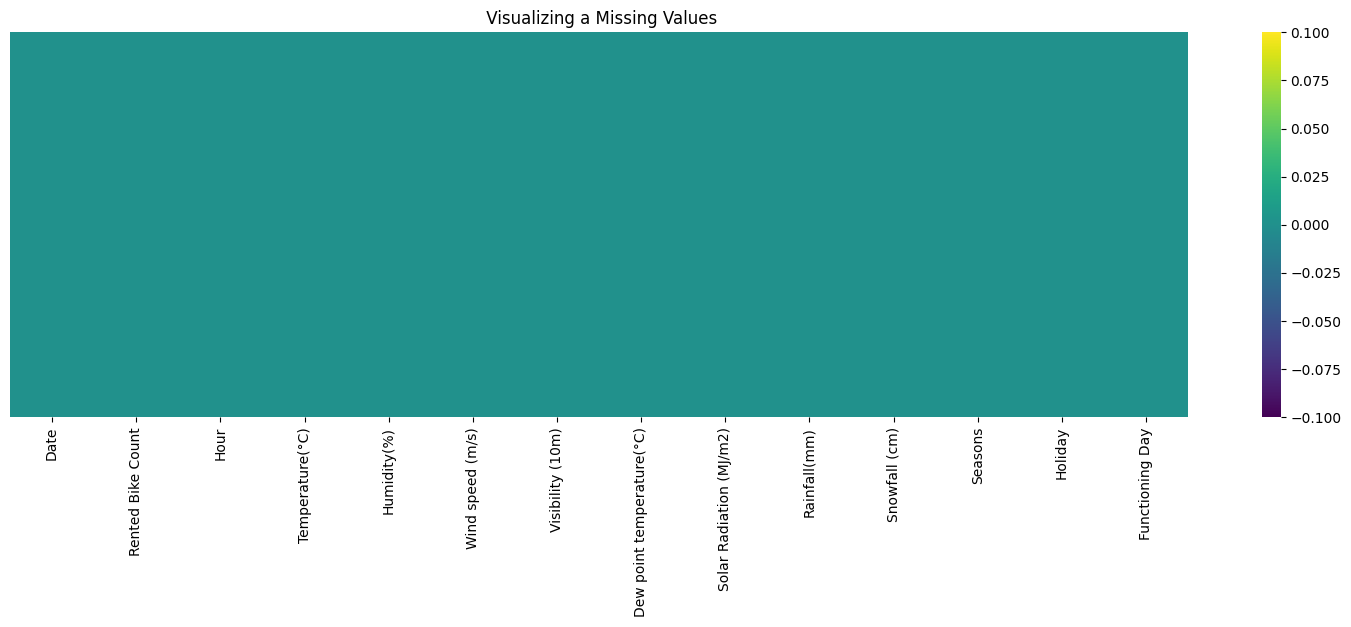

In [13]:
# Visualizing Missing Values/Null Values Using heatmap
plt.figure(figsize=(19,5))
sns.heatmap(Bike_df.isnull(),cmap='viridis',annot=False,yticklabels=False)
plt.title(" Visualizing a Missing Values")

**As we can their is no missing or Null value.**

#### Duplicate Values

**That's why it's important to remove duplicate records from data.**

"Duplicate" simply means you have a duplicate file in your file. This may be due, for example, to incorrect data entry or data collection procedures. By eliminating duplicates in our database, we don't send multiple communications to the same person, saving time and money.

**Cheking duplicate values**

In [14]:
value=len(Bike_df[Bike_df.duplicated()])
print("no of duplicate values in the datadet is =",value)

no of duplicate values in the datadet is = 0


**The above data after count the missing and duplicate value we saw there are no missing values are present.**

**Some of the columns name the dataset are too large and clumsy so we can change some simple names, and it don't affect our final results.** 





### Changing Column name.

In [15]:
# Rename the complex columns name
Bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count', 
                        'Temperature(°C)':'Temperature', 
                        'Humidity(%)':'Humidity',
                        'Wind speed (m/s)':'Wind speed', 
                        'Visibility (10m)':'Visibility', 
                        'Dew point temperature(°C)':'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)':'Solar_Radiation', 
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
                        'Functioning Day':'Functioning_Day'})

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind speed  \
0     01/12/2017                254     0         -5.2        37         2.2   
1     01/12/2017                204     1         -5.5        38         0.8   
2     01/12/2017                173     2         -6.0        39         1.0   
3     01/12/2017                107     3         -6.2        40         0.9   
4     01/12/2017                 78     4         -6.0        36         2.3   
...          ...                ...   ...          ...       ...         ...   
8755  30/11/2018               1003    19          4.2        34         2.6   
8756  30/11/2018                764    20          3.4        37         2.3   
8757  30/11/2018                694    21          2.6        39         0.3   
8758  30/11/2018                712    22          2.1        41         1.0   
8759  30/11/2018                584    23          1.9        43         1.3   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0           2000                  -17.6              0.0       0.0       0.0   
1           2000                  -17.6              0.0       0.0       0.0   
2           2000                  -17.7              0.0       0.0       0.0   
3           2000                  -17.6              0.0       0.0       0.0   
4           2000                  -18.6              0.0       0.0       0.0   
...          ...                    ...              ...       ...       ...   
8755        1894                  -10.3              0.0       0.0       0.0   
8756        2000                   -9.9              0.0       0.0       0.0   
8757        1968                   -9.9              0.0       0.0       0.0   
8758        1859                   -9.8              0.0       0.0       0.0   
8759        1909                   -9.3              0.0       0.0       0.0   

     Seasons     Holiday Functioning_Day  
0     Winter  No Holiday             Yes  
1     Winter  No Holiday             Yes  
2     Winter  No Holiday             Yes  
3     Winter  No Holiday             Yes  
4     Winter  No Holiday             Yes  
...      ...         ...             ...  
8755  Autumn  No Holiday             Yes  
8756  Autumn  No Holiday             Yes  
8757  Autumn  No Holiday             Yes  
8758  Autumn  No Holiday             Yes  
8759  Autumn  No Holiday             Yes  

[8760 rows x 14 columns]

**Python reads column "date" as an object type, basically  as a string, because date column is very important for analyzing user's behavior, so we need to convert it to date type text and split it into 3 columns, for example 'year', ' month', 'day' are categorical data types.**

###**Breaking Date Column**

In [16]:
# Changing "Date" column into three "Year","Month","Day" column. 
Bike_df['Date']=Bike_df['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))


In [17]:
Bike_df['Year']=Bike_df['Date'].dt.year
Bike_df['Month']=Bike_df['Date'].dt.month
Bike_df['Day']=Bike_df['Date'].dt.day_name()

In [18]:
# Creating new column of "weekends_weekend" and drop the column "Date","Day","Year".
Bike_df['weekends_weekend'] = Bike_df['Day'].apply(lambda x: 1 if x == 'Saturday' or x == 'Sunday' else 0)
Bike_df = Bike_df.drop(columns=['Date','Day','Year'],axis=1)


*   Converting date column into 3 different column i.e "Year", "Month","Day"
*   The "Year" column in our data intially contains 2 unique numbers with contains 2017 December to 2018 November, so i think it's a year we don't need "Year" row, so we are removing or drop it.
*   Another 'day' column with details about each day of the month, we don't need data for each day of the month for our relationship, but if a day is a working day or a holiday, we need data about what we're converting. set it to this format and display the "day" line.








In [19]:
Bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Month  \
0           0.0            0.0  Winter  No Holiday             Yes     12   
1           0.0            0.0  Winter  No Holiday             Yes     12   
2           0.0            0.0  Winter  No Holiday             Yes     12   
3           0.0            0.0  Winter  No Holiday             Yes     12   
4           0.0            0.0  Winter  No Holiday             Yes     12   

   weekends_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [20]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

In [21]:
Bike_df['weekends_weekend'].value_counts()

0    6264
1    2496
Name: weekends_weekend, dtype: int64

### Changing Data Types

**Columns such as "Hour", "Month", "Weekday Weekend" are displayed as equal data, but are actually a categorical data type. So we need to change this information and if we don't, when we do further analysis and interact with it, the values ​​are not correct so we can make mistakes.**

In [22]:
Bike_df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Month                          12
weekends_weekend                2
dtype: int64

In [23]:
from tables.table import Cols
# Change the int64 into category column
cols=['Hour','Month','weekends_weekend']
for col in cols:
  Bike_df[col]= Bike_df[col].astype('category')

In [24]:
# lets check the result data type
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  Month                      8760 n

In [25]:
Bike_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'weekends_weekend'],
      dtype='object')

In [26]:
Bike_df['weekends_weekend'].unique()

[0, 1]
Categories (2, int64): [0, 1]



###***Exploratory Data Analysis Of Data set.***

###**Why do we perfrome EDA?**

**EDA is a Exercising analysis designed to reveal the underlying structure of data and is important to companies as it reveals subtle patterns, patterns and relationships.**

###**Univariate Analysis**

###**Why we do univariate analysis?**

  *   **The main purpose of univariate analysis is to simply describe the data to find patterns in the data.**





###**Analysis Of Dependent Varible:**

###**What is dependent variable in data anlysis?**

**We define three variables, which are variables whose value changes depending on the value of another variable.**

###**Analaysation Of Categorical Variables :**

**Our variable is "Number of Bike Rentals" so we need to compare this column with other columns using a view. First we determine the categorical data types, then we move on to the phone data**

# Analysis of data by Visualization.


In [27]:
# Creating numerical columns list
numeric_col=Bike_df.describe().columns.tolist()
numeric_col



['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

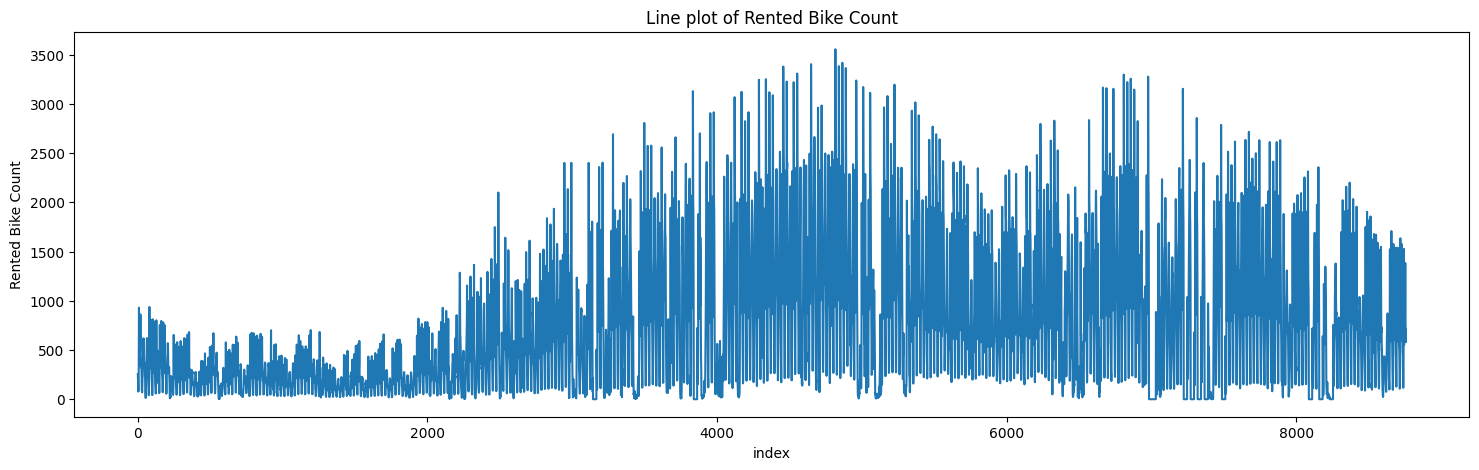

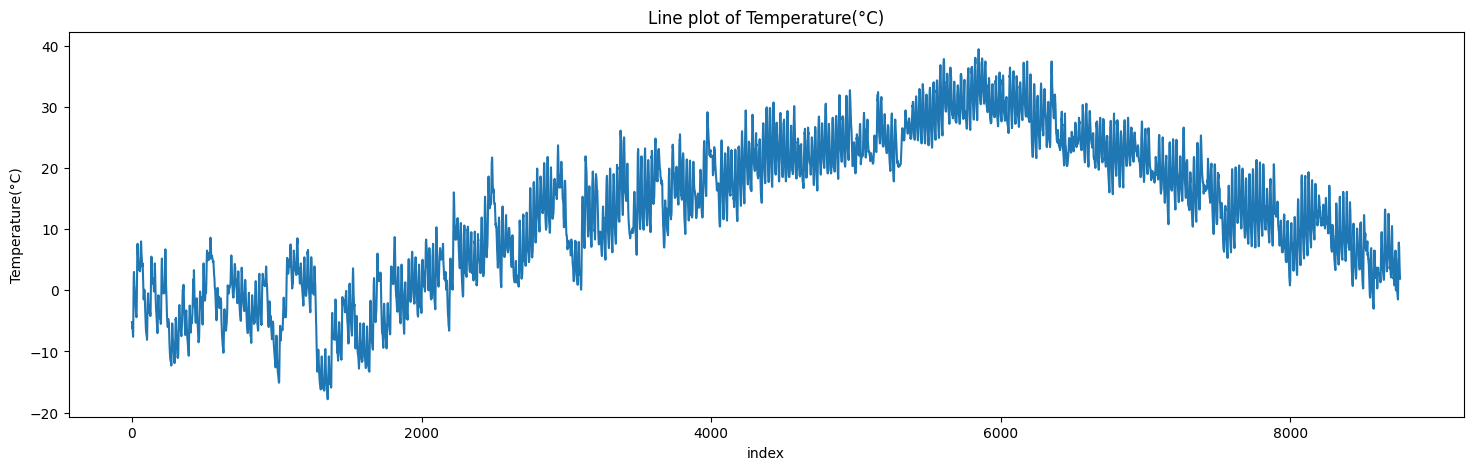

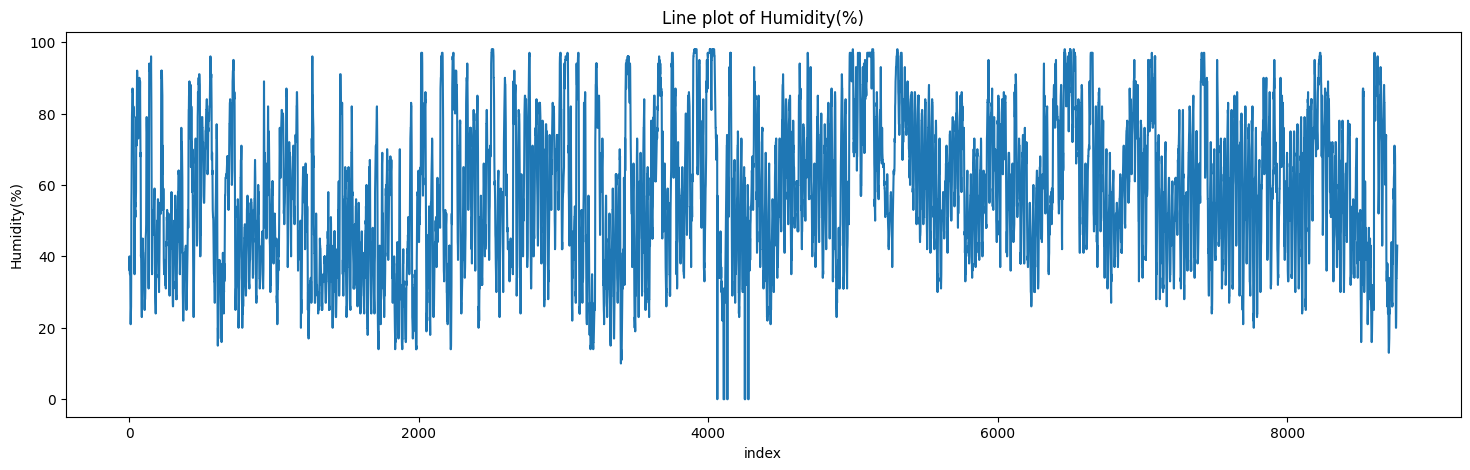

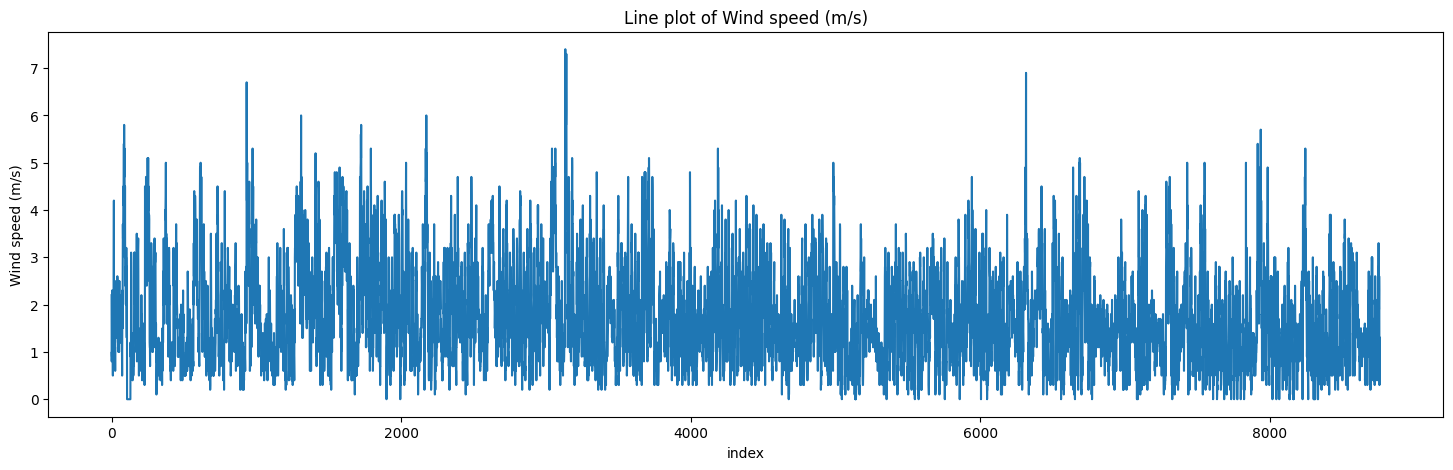

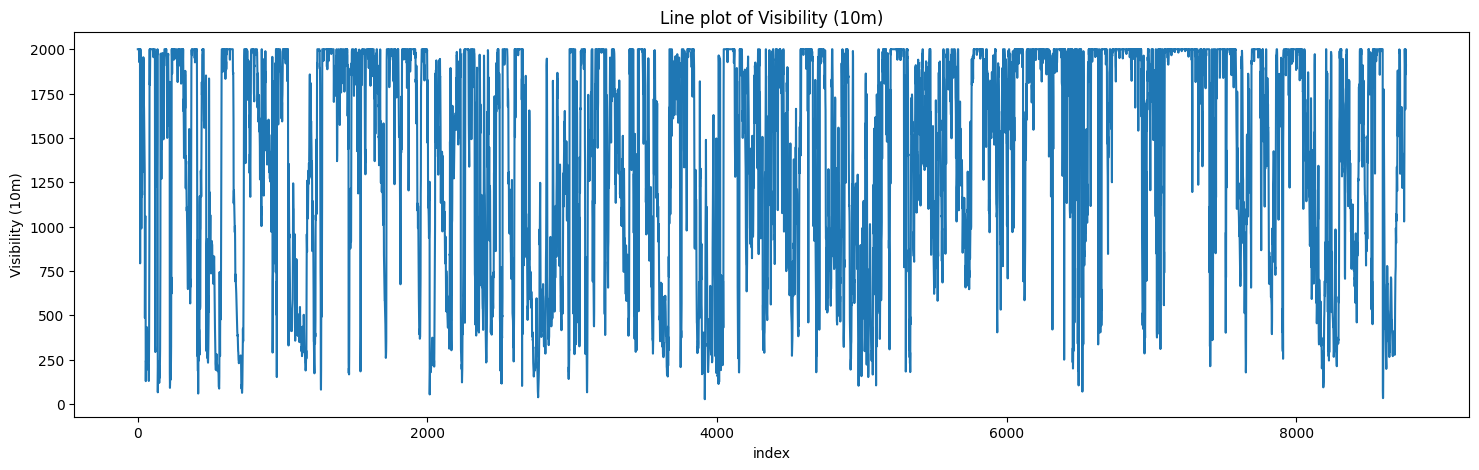

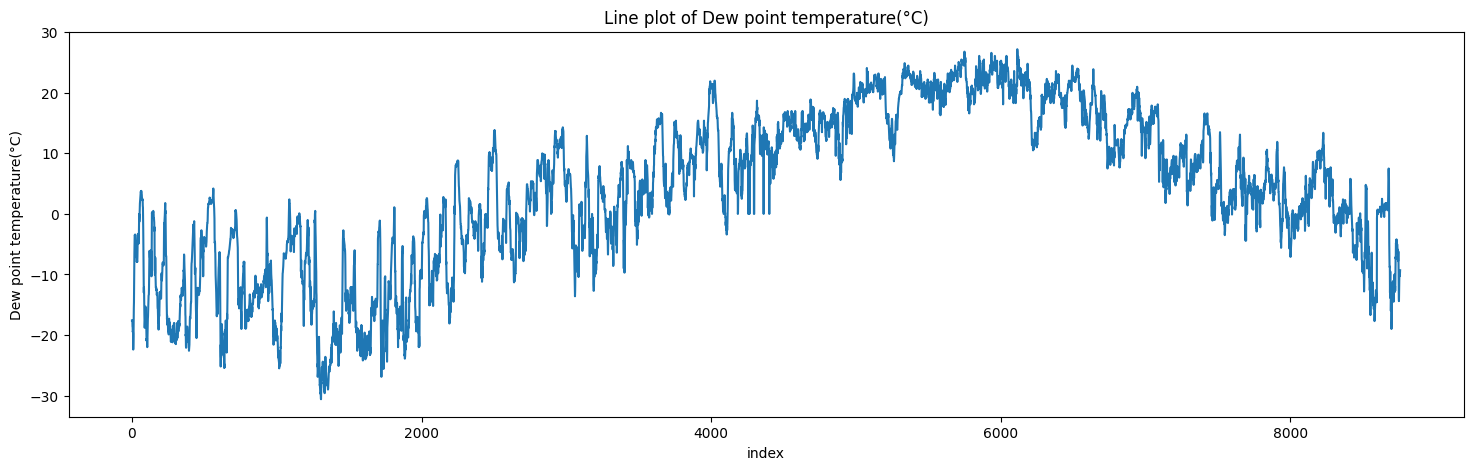

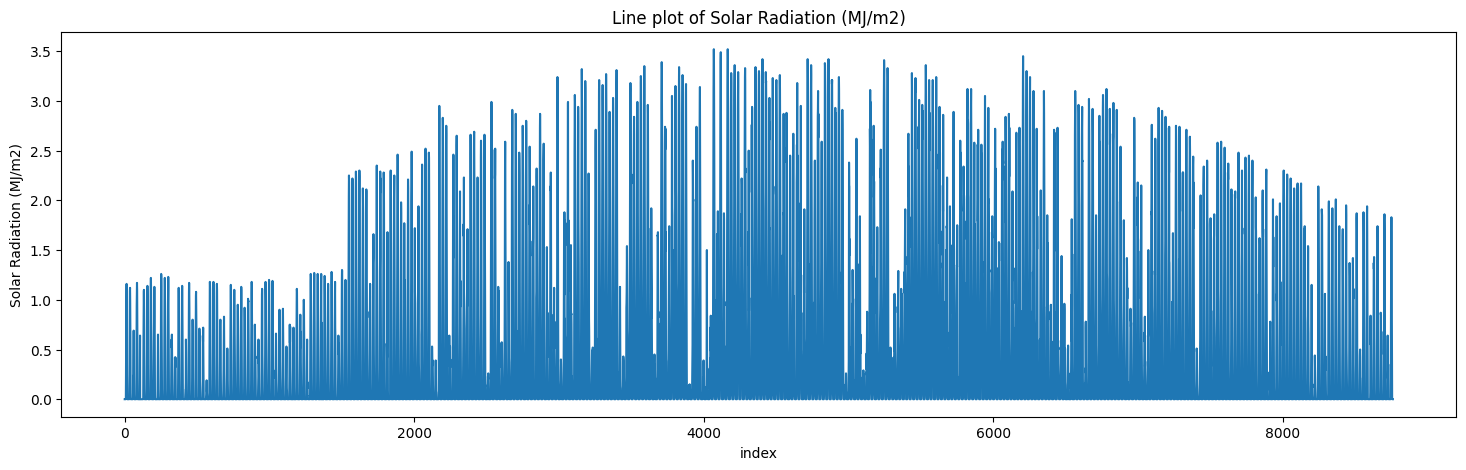

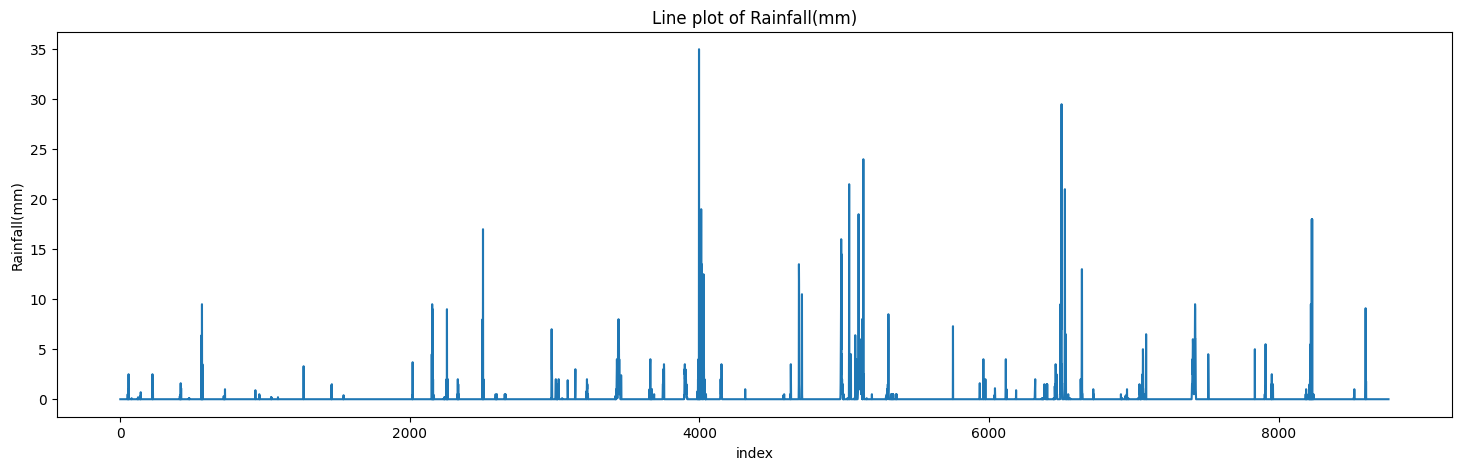

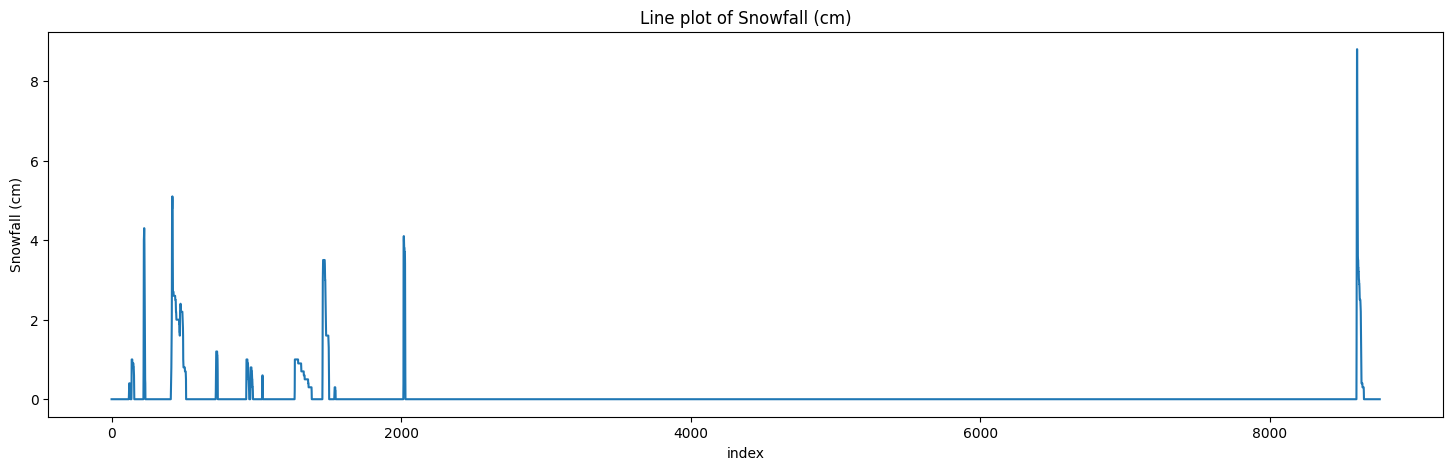

In [28]:
for col in numeric_col:
    fig, ax = plt.subplots(figsize=(18, 5))
    sns.lineplot(x=Bike_df.index, y=Bike_df[col], ax=ax)
    ax.set_xlabel('index')
    ax.set_ylabel(col)
    ax.set_title(f'Line plot of {col}')
    plt.show()

In [29]:
# Creating categorical columns list
categorical_columns=list(set(Bike_df.columns) - set(Bike_df.describe().columns))
categorical_columns

['Holiday', 'Functioning Day', 'weekends_weekend', 'Hour', 'Month', 'Seasons']

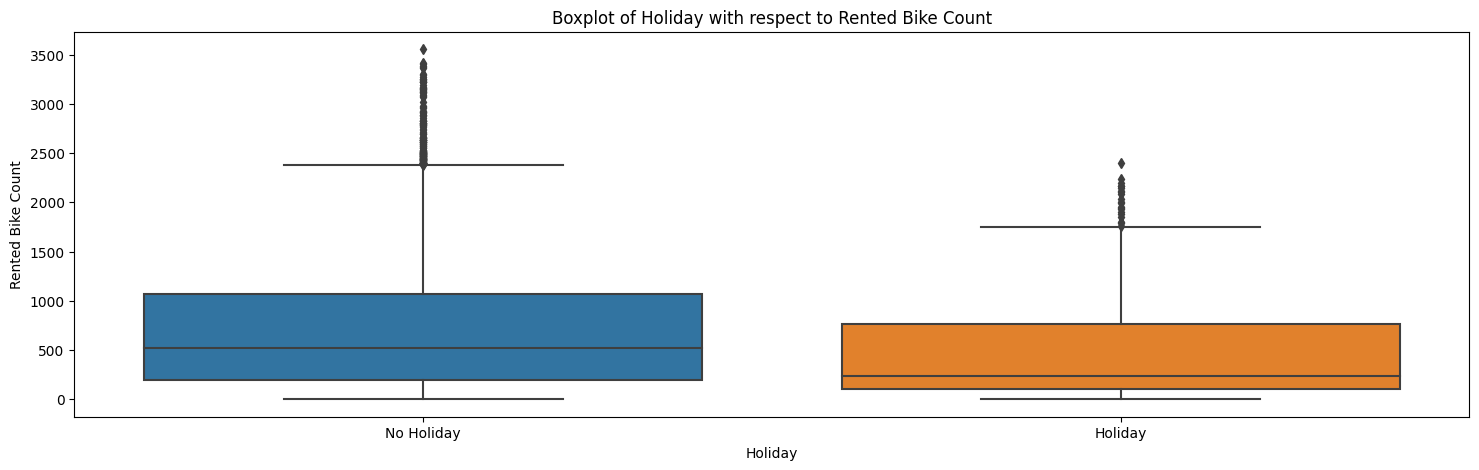

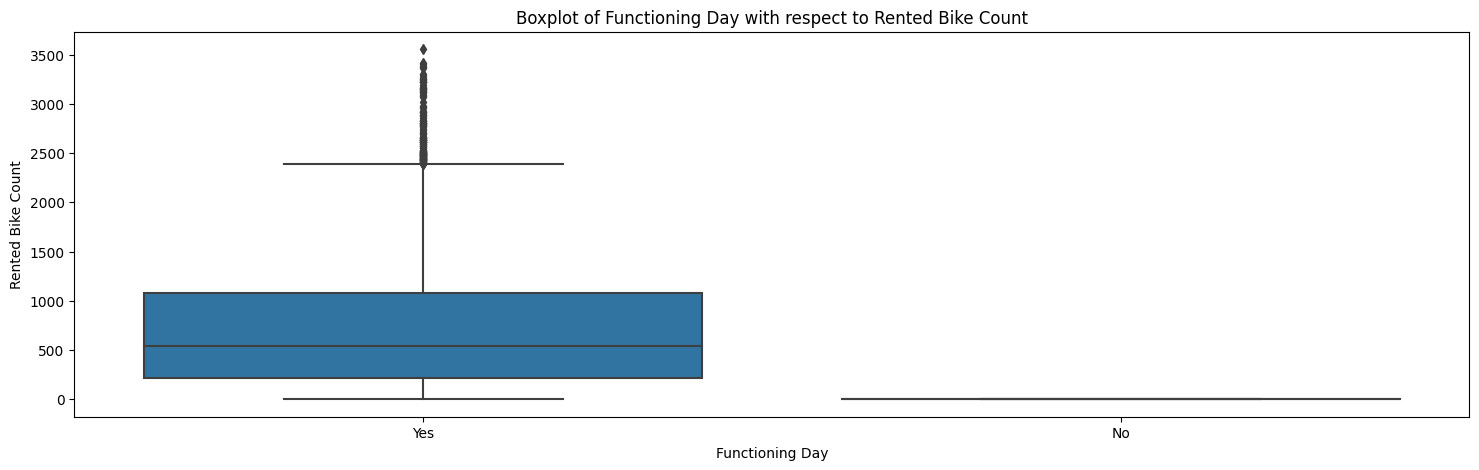

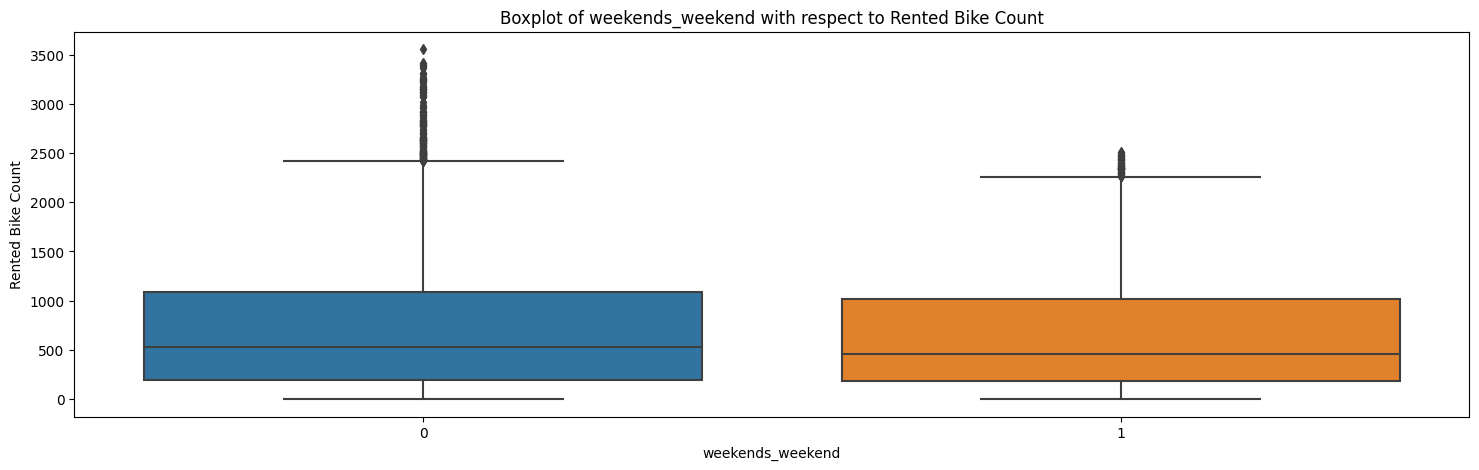

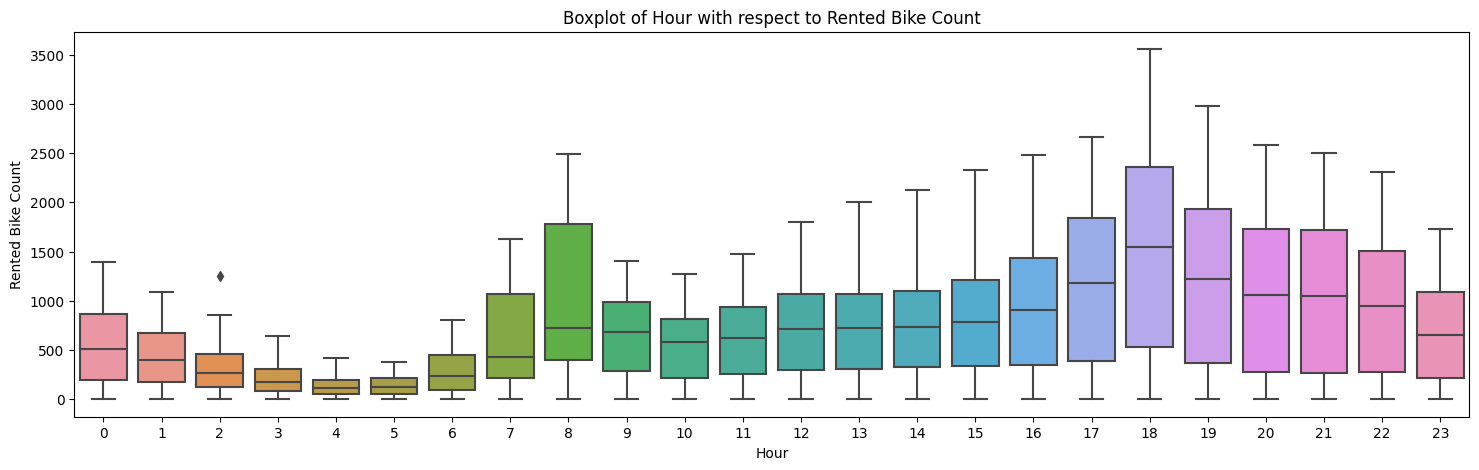

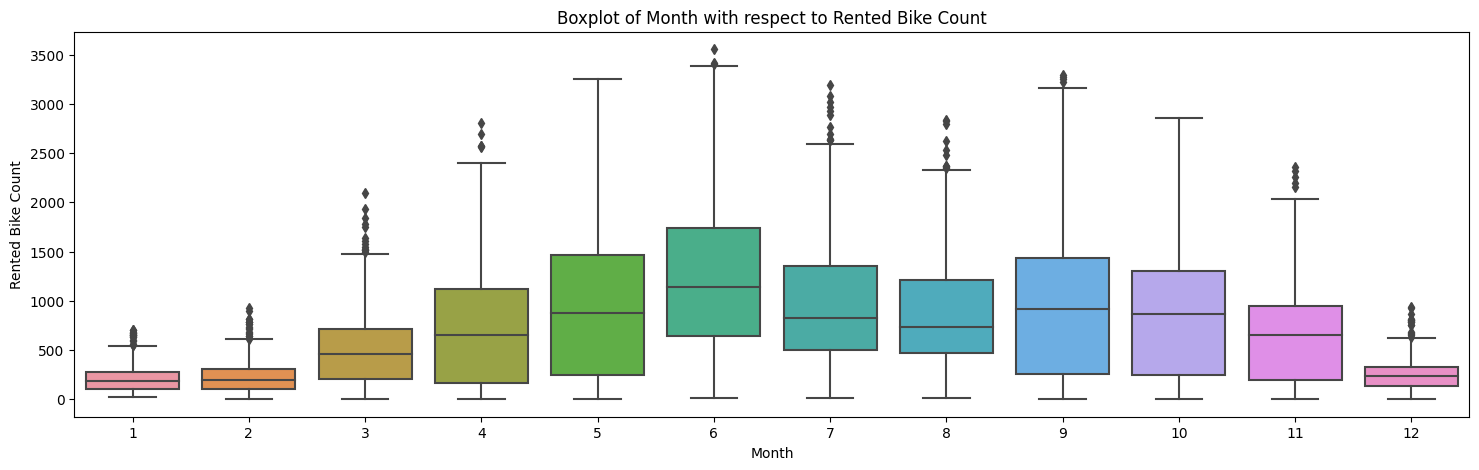

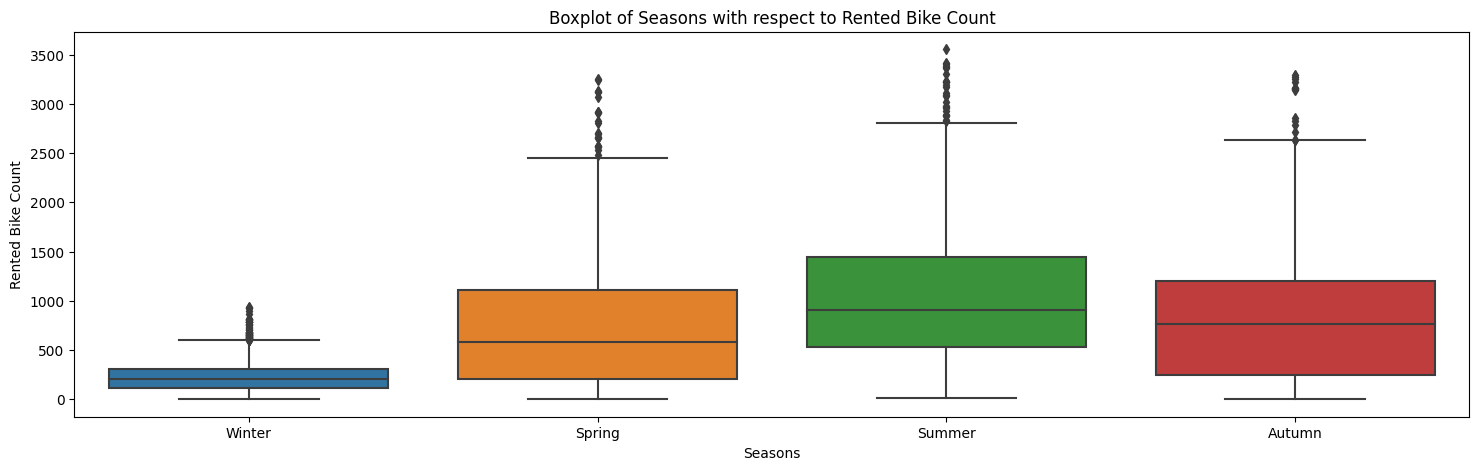

In [30]:
for col in categorical_columns:
  fig, ax = plt.subplots(figsize=(18,5))
  sns.boxplot(x=col, y='Rented Bike Count', data=Bike_df, ax=ax)
  ax.set_xlabel(col)
  ax.set_ylabel('Rented Bike Count')
  ax.set_title(f'Boxplot of {col} with respect to Rented Bike Count')
  plt.show()




###**Observation From Above Charts.**



*   Cycling is at its highest in summer. Most people will rent bikes during the summer months. Bicycle prices in winter are quite low compared to other seasons.

*   Many bikes are rented "when there is no vacation.
*   There are no bicycles for rent on non-working days. We only have 295 "no" numbers. So we can put 295 values ​​but it just won't add value to "yes" column. So the lines don't end for us. We will delete them in the next step.


*   Most bikes are rented on weekdays, not weekends.

 
*   The number of bicycles starts to increase from March and peaks in June. 






###   **Let's Check bike rent count trend with respect to Hour on Functioning days weekend or weekdays, Seasons, Holidays columns.**

In [31]:
# Creating categorical columns list
categorical_columns=list(set(Bike_df.columns) - set(Bike_df.describe().columns))
categorical_columns


['Holiday', 'Functioning Day', 'weekends_weekend', 'Hour', 'Month', 'Seasons']

Text(0.5, 1.0, 'Bike Rental Trend According To Hour On Holiday / No Holiday')

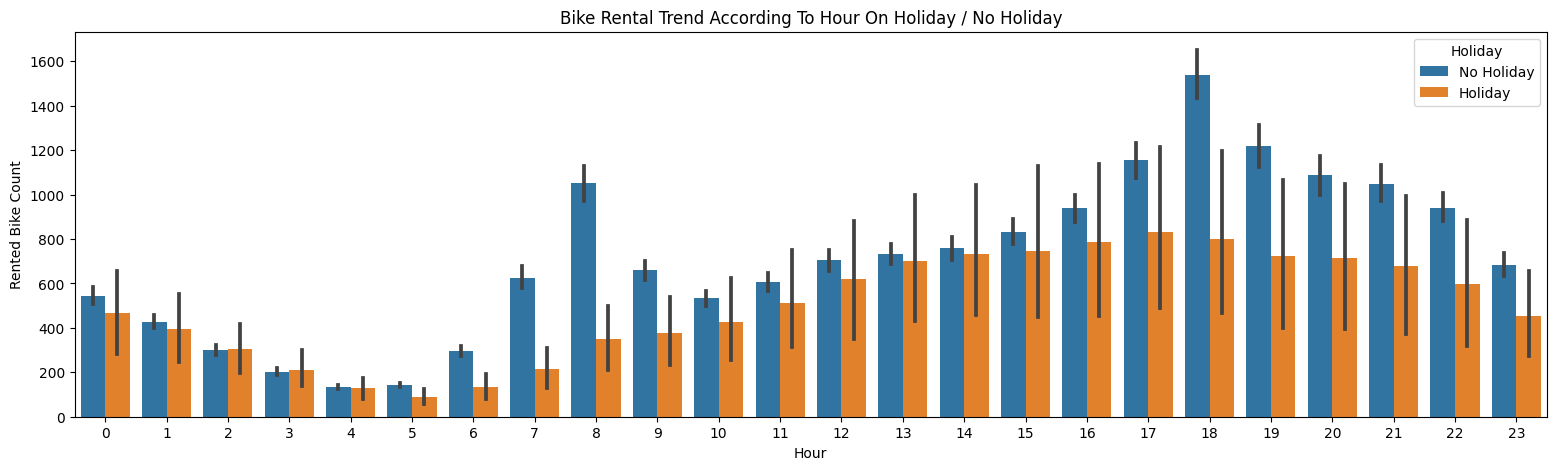

In [32]:
# Bike Rental Trend With Respect To Hour on Holiday or No Holiday.
plt.figure(figsize=(19,5))
sns.barplot(x = Bike_df['Hour'], y=Bike_df['Rented Bike Count'], hue=Bike_df['Holiday'])
plt.title("Bike Rental Trend According To Hour On Holiday / No Holiday")

     



*   Sudden peak between 6/7 and 10:00. Working hours, college and office hours may be responsible for this sudden happening. (There is no holiday). But on holidays, things are different and there are fewer bikes.

*   There is another peak between 10:00 in the morning and 19:00 in the evening. It may be time to work on the people above. (There is no holiday).



Text(0.5, 1.0, 'Bike Rental Trend According To Hour On Functioning Day')

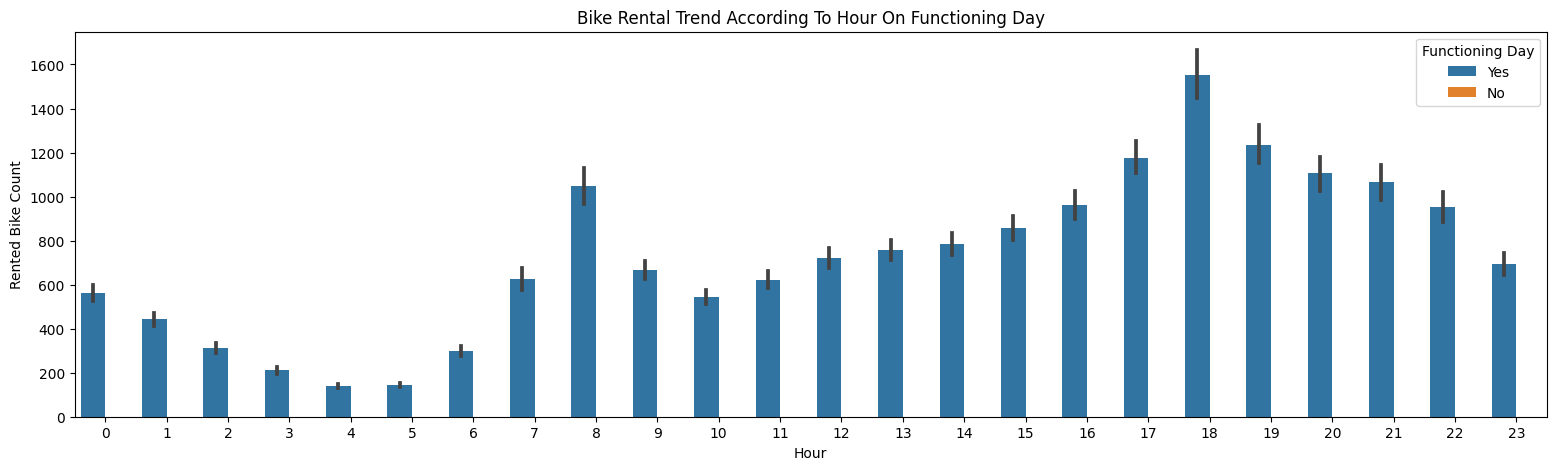

In [33]:
# Bike Rental Trend With Respect To Hour on Funtioning day.
plt.figure(figsize=(19,5))
sns.barplot(x = Bike_df['Hour'], y=Bike_df['Rented Bike Count'], hue=Bike_df['Functioning Day'])
plt.title("Bike Rental Trend According To Hour On Functioning Day")

**1) The formula here is the same for non-working days. The only difference is that there is no cycling on non-work days.**

**2) If we do not remove the line on the working day. We only collect business day prices. So a column with a default value doesn't always help.**

Text(0.5, 1.0, 'Bike Rental Trend According To Hour On Seasons')

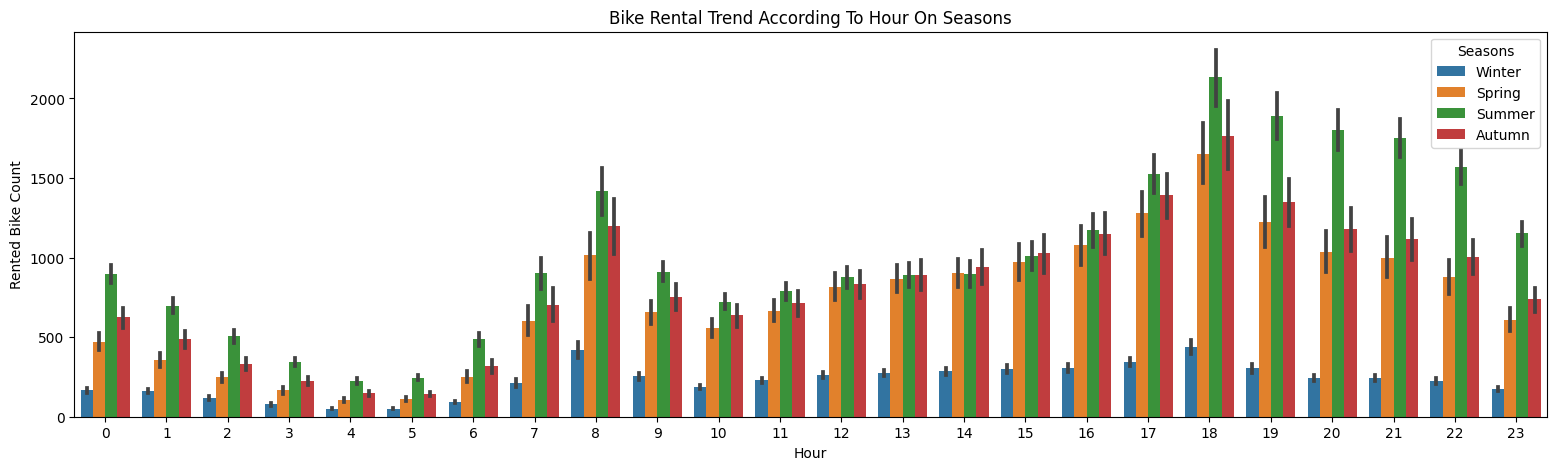

In [34]:
# Bike Rental Trend With Respect To Hour on Seasons.
plt.figure(figsize=(19,5))
sns.barplot(x = Bike_df['Hour'], y=Bike_df['Rented Bike Count'], hue=Bike_df['Seasons'])
plt.title("Bike Rental Trend According To Hour On Seasons")

Text(0.5, 1.0, 'Bike Rental Trend According To Hour On Month')

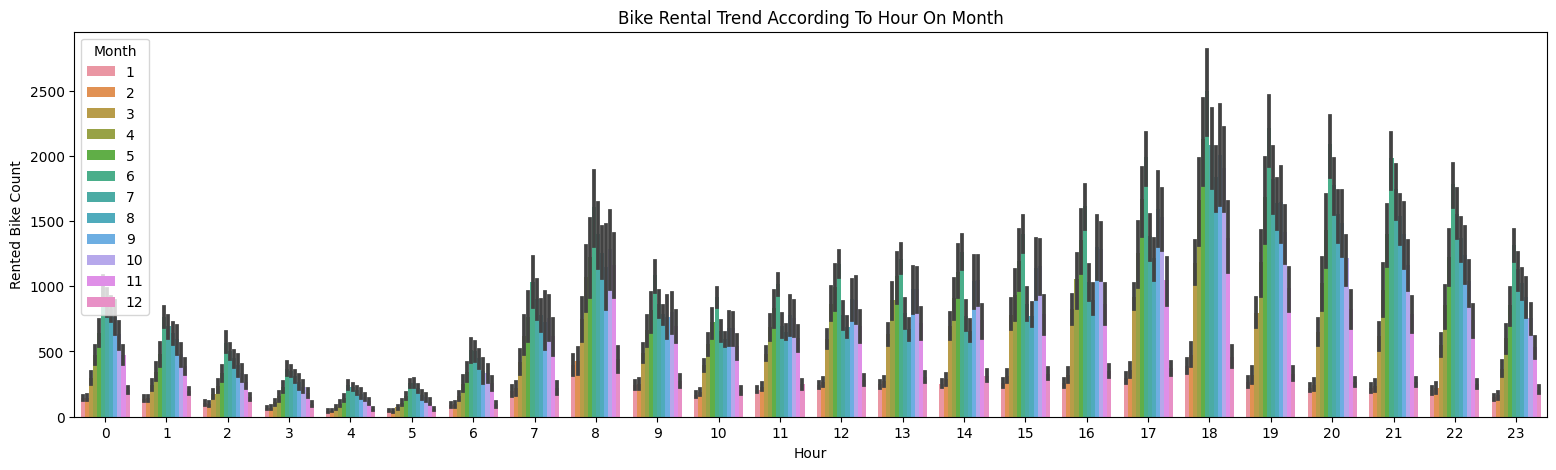

In [35]:
# Bike Rental Trend With Respect To Hour on Month.
plt.figure(figsize=(19,5))
sns.barplot(x = Bike_df['Hour'], y=Bike_df['Rented Bike Count'], hue=Bike_df['Month'])
plt.title("Bike Rental Trend According To Hour On Month")

Text(0.5, 1.0, 'Bike Rental Trend According To Hour On weekends_weekend')

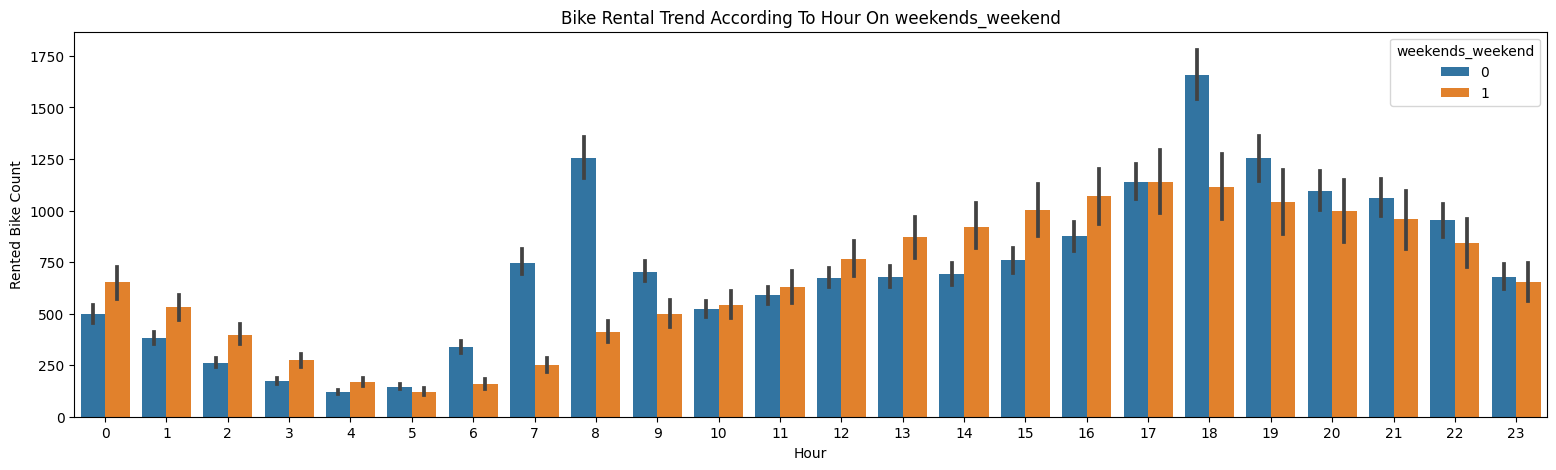

In [36]:
# Bike Rental Trend With Respect To Hour on weekends_weekend .
plt.figure(figsize=(19,5))
sns.barplot(x = Bike_df['Hour'], y=Bike_df['Rented Bike Count'], hue=Bike_df['weekends_weekend'])
plt.title("Bike Rental Trend According To Hour On weekends_weekend")

##  **Analyzing of Numerical Variables.**

**What is numerical data**

**Numeric data is a type of data that is represented by numbers rather than descriptors. Numerical data, sometimes called quantitative data, is always written in numbers. Numeric data is distinguished from other data types by the ability to perform arithmetic operations on these numbers.**

In [37]:
# Assign a numerical column to variable
numerical_columns = list(Bike_df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

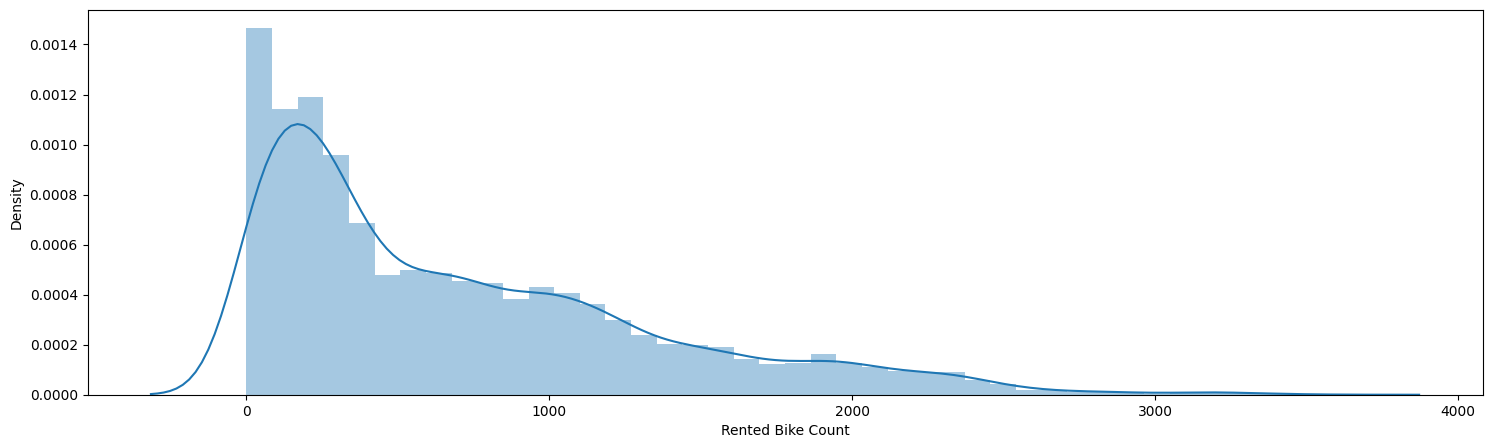

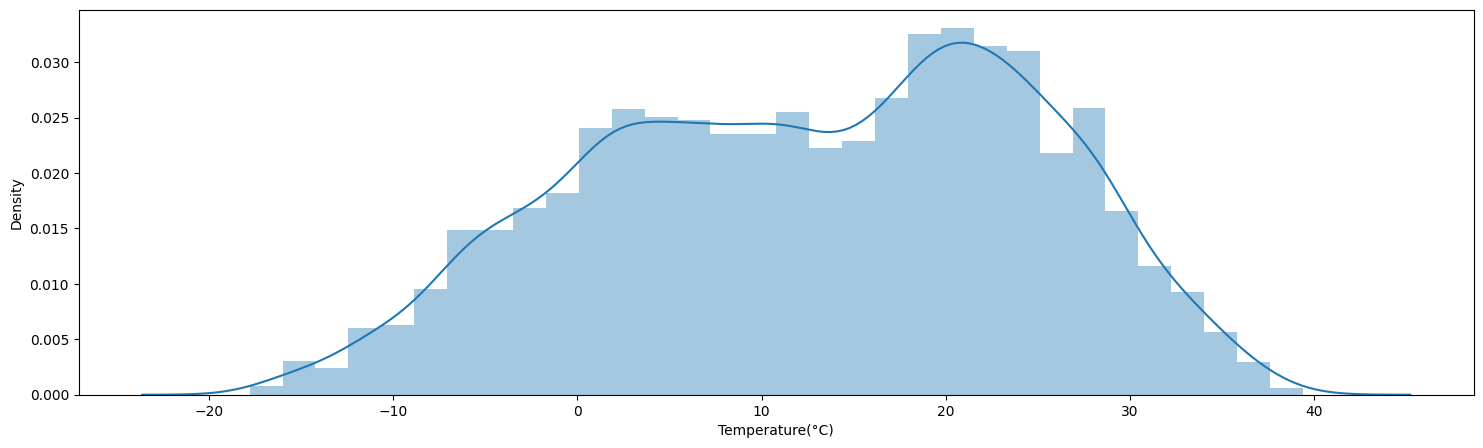

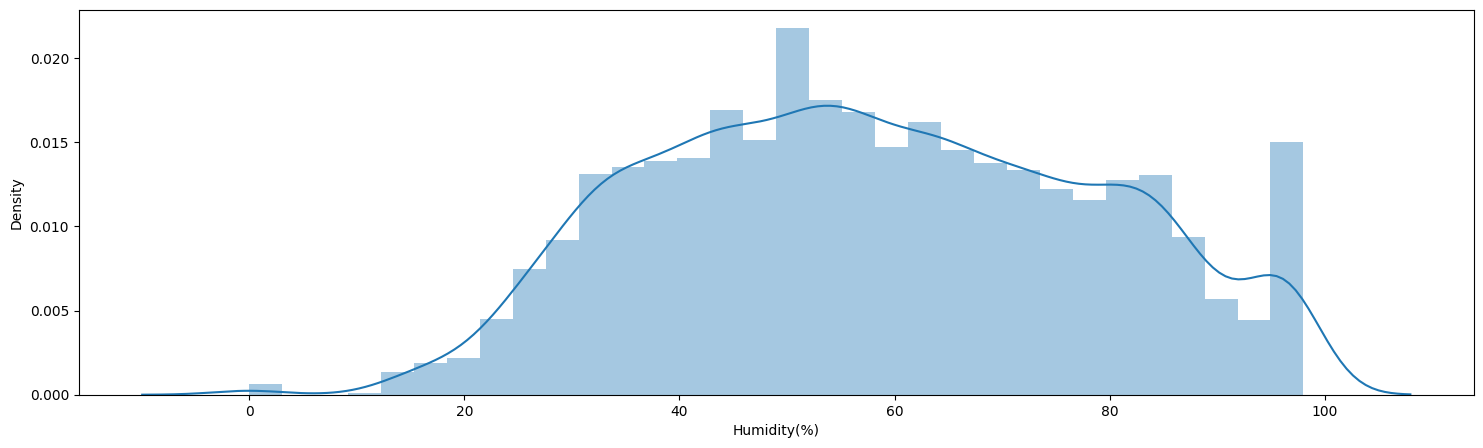

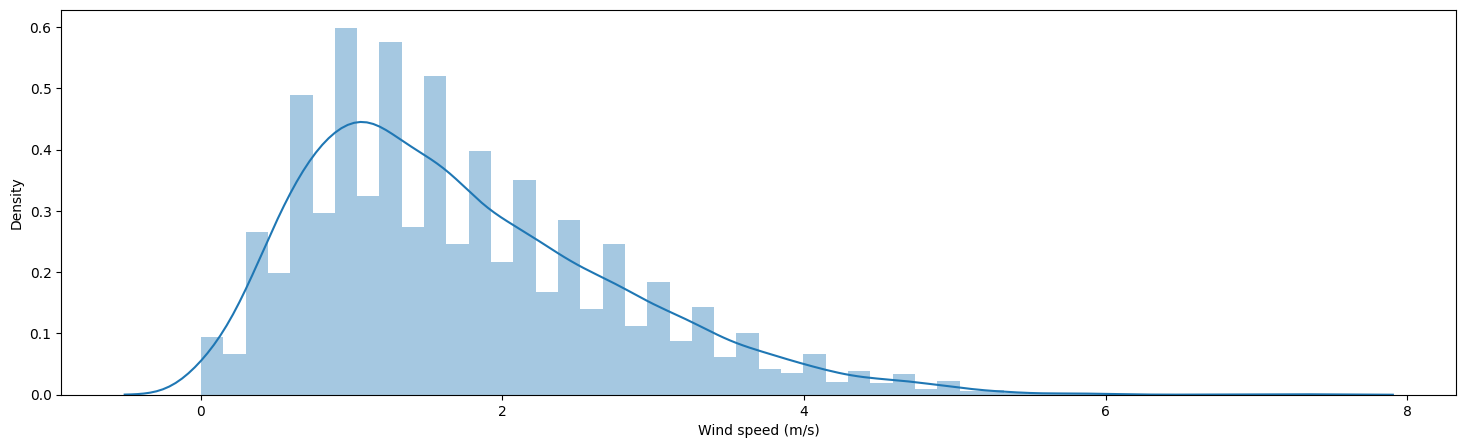

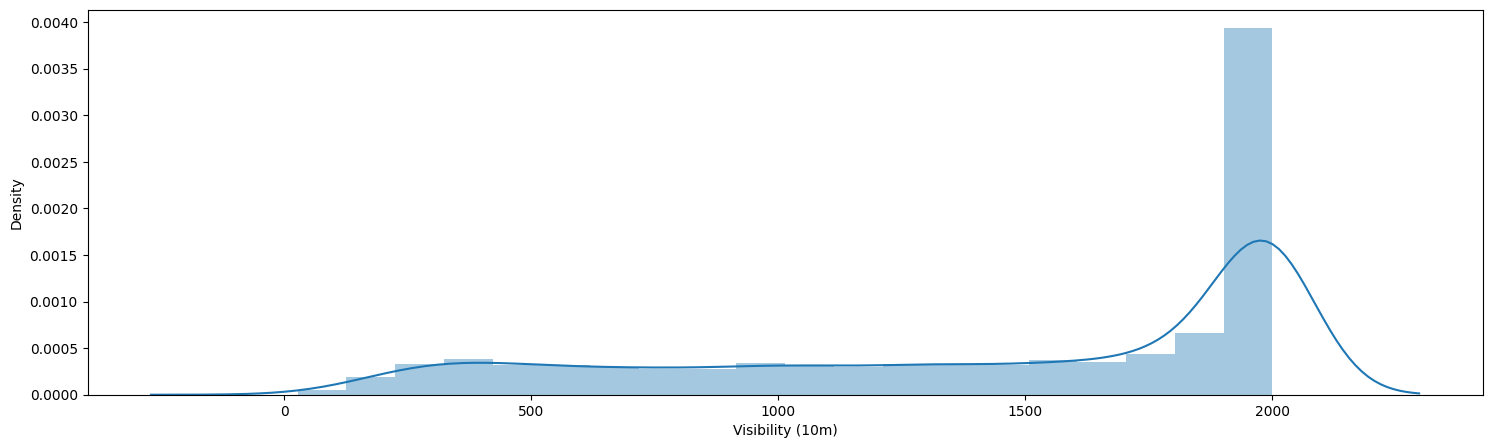

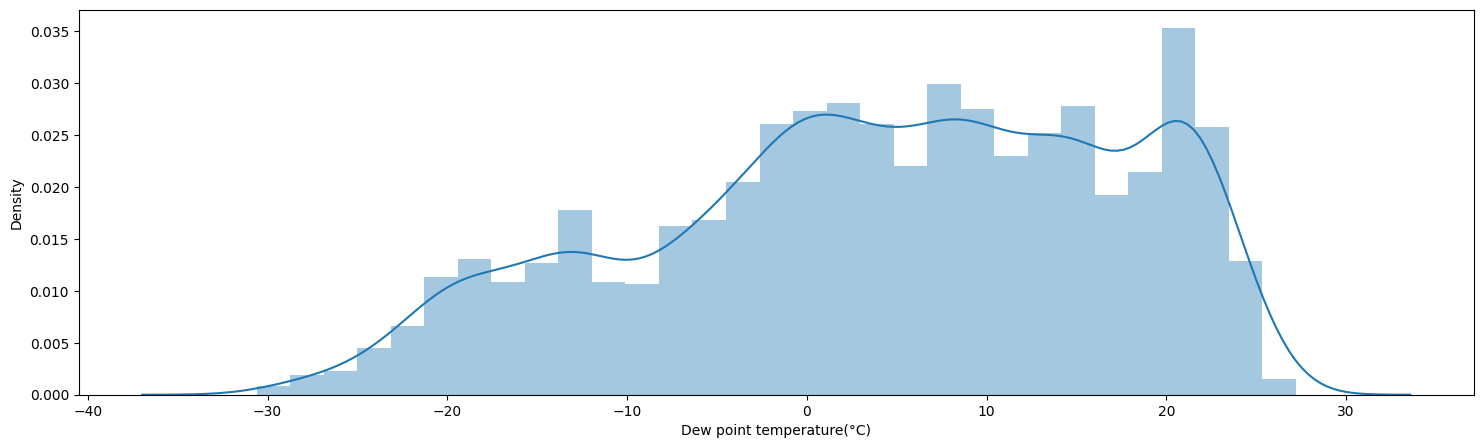

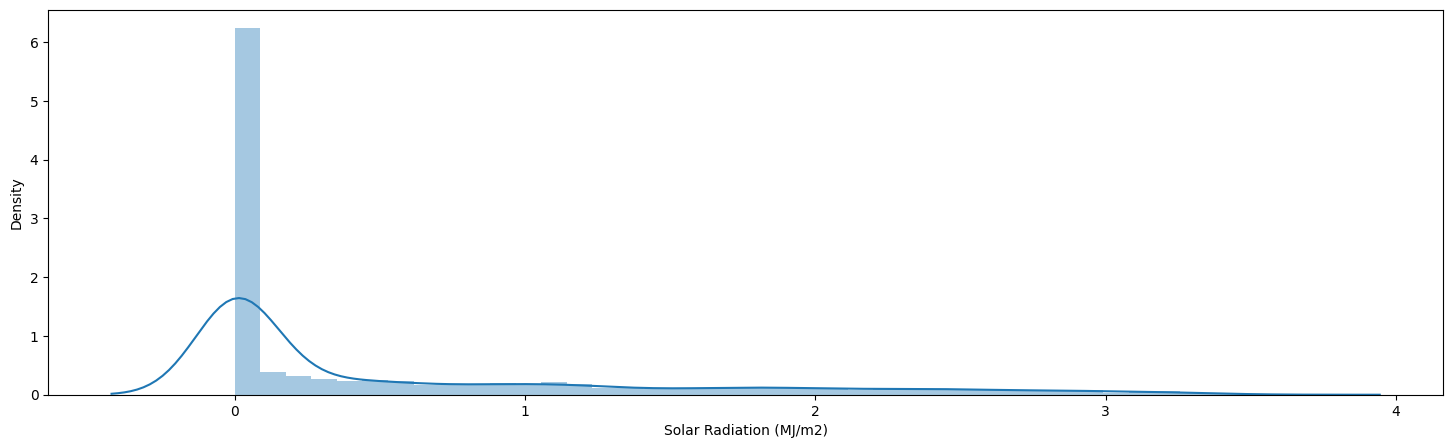

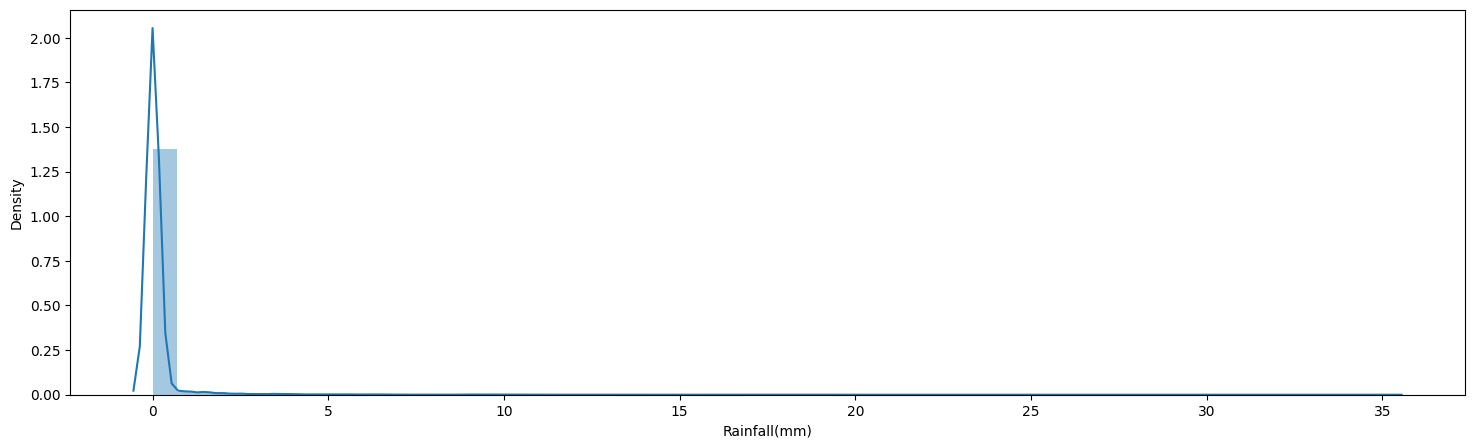

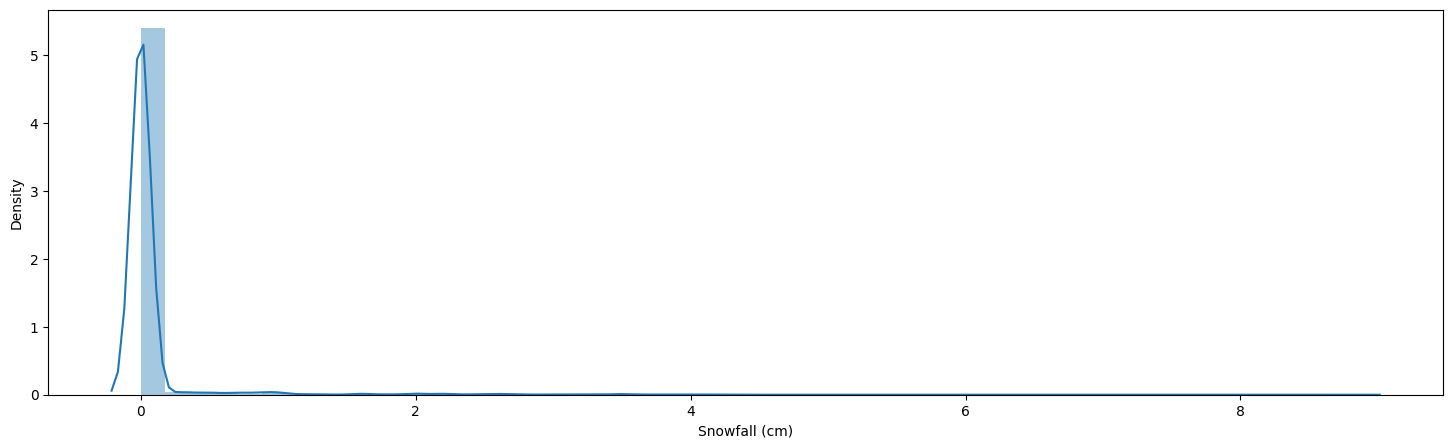

In [38]:
#printing displot to analying the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(18,5))
  sns.distplot(x=Bike_df[col])
  plt.xlabel(col)
plt.show()






### **Observation :**

 


*   **From the picture above, we can see that people like to ride a bike in hot weather with an average temperature of 25°C.**

*   **It's almost the same as "temperature" from the "dew_point_temperature" figure above, we can check it in the next step.**




*   **From the picture above we can see that the bike rental is huge and in the case of solar power the counter of the rental price is around 1000**

*   **From the graph, we can see that the number of rental cars on the y-axis is very small. Cycling stops when more than 4 cm of snow falls.**



*   **From the above figure, we see that even if it rains a lot, the demand for rental bikes does not decrease, for example, even if it rains for 20 months, the demand for cars is still high.**

*   **We understand from the figure above that the demand for bike rental is the same regardless of the wind speed, but the demand for bikes increases when the wind speed is 7 m/s Plus, people like to rent bikes. Cycling when the wind is low.**







### **Liner Regression**



*   **Regression charts in Seaborn are often used during data analysis to add visual direction to help highlight patterns in datasets. As the name suggests, a standard chart creates a regression line between two parameters and helps to visualize the relationship between them.**




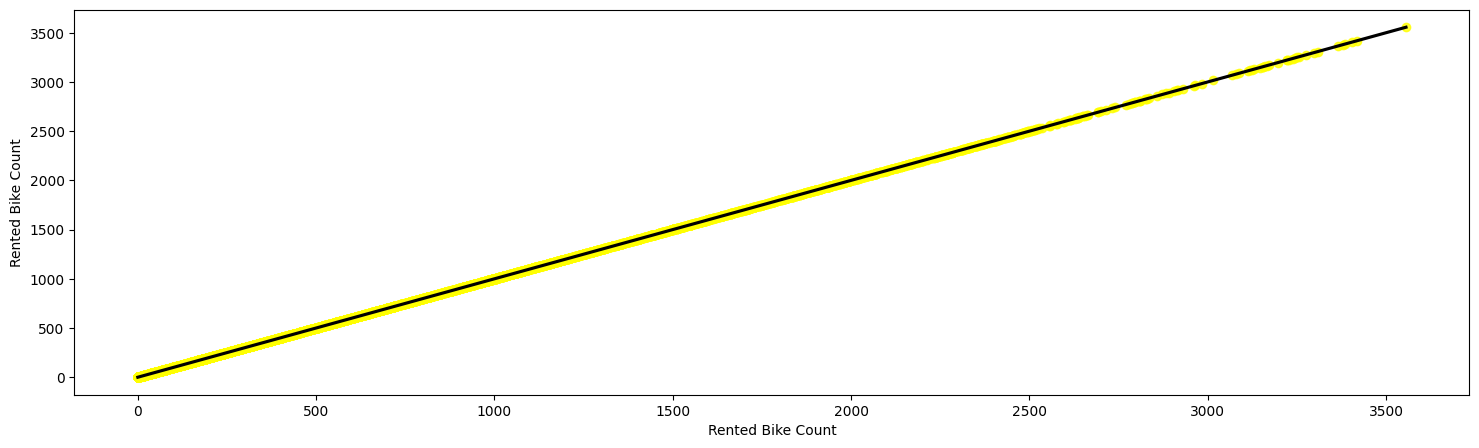

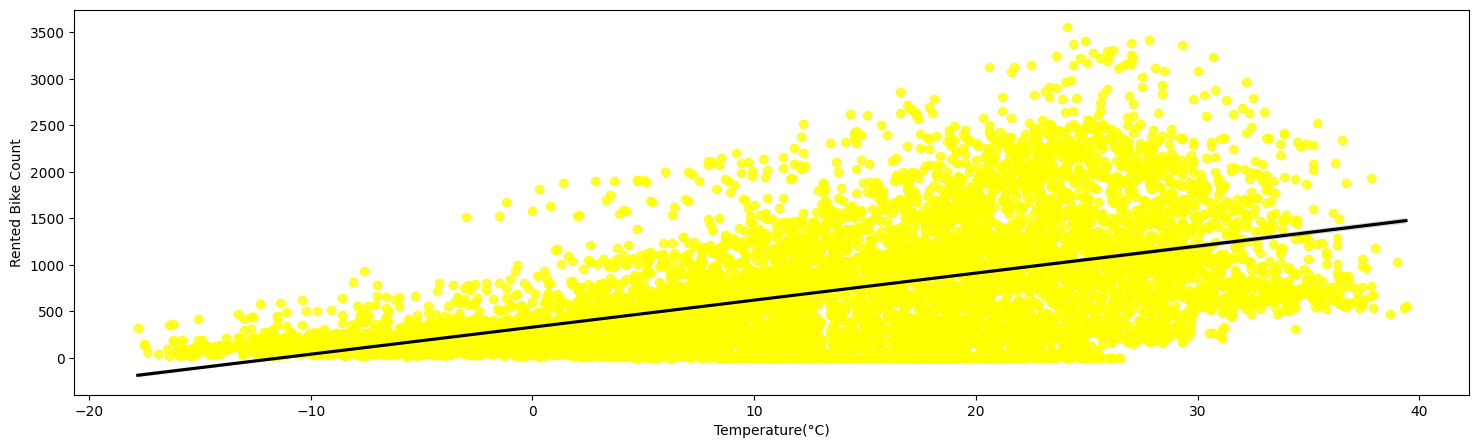

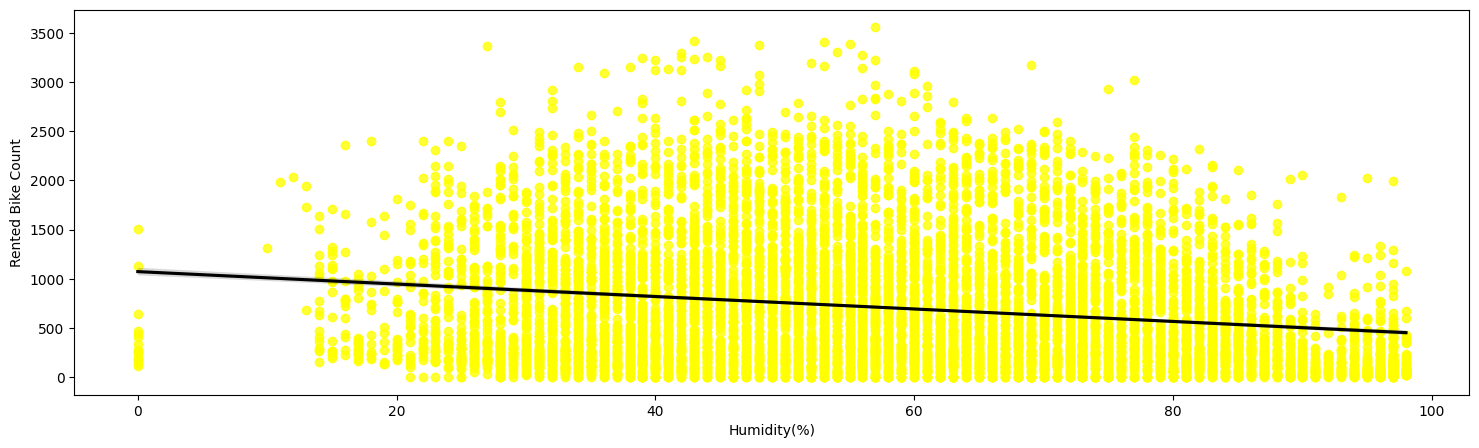

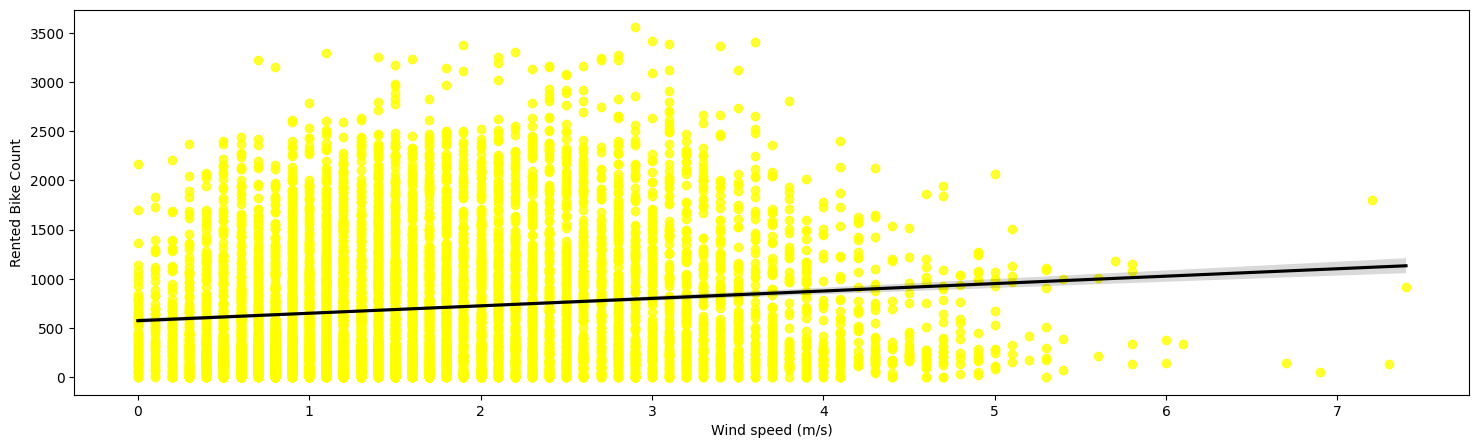

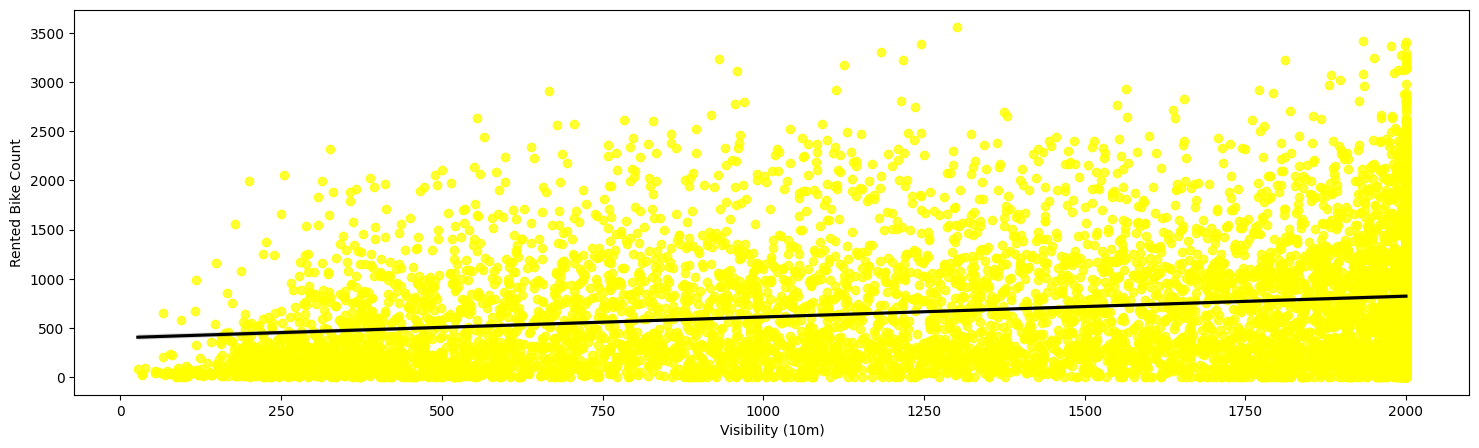

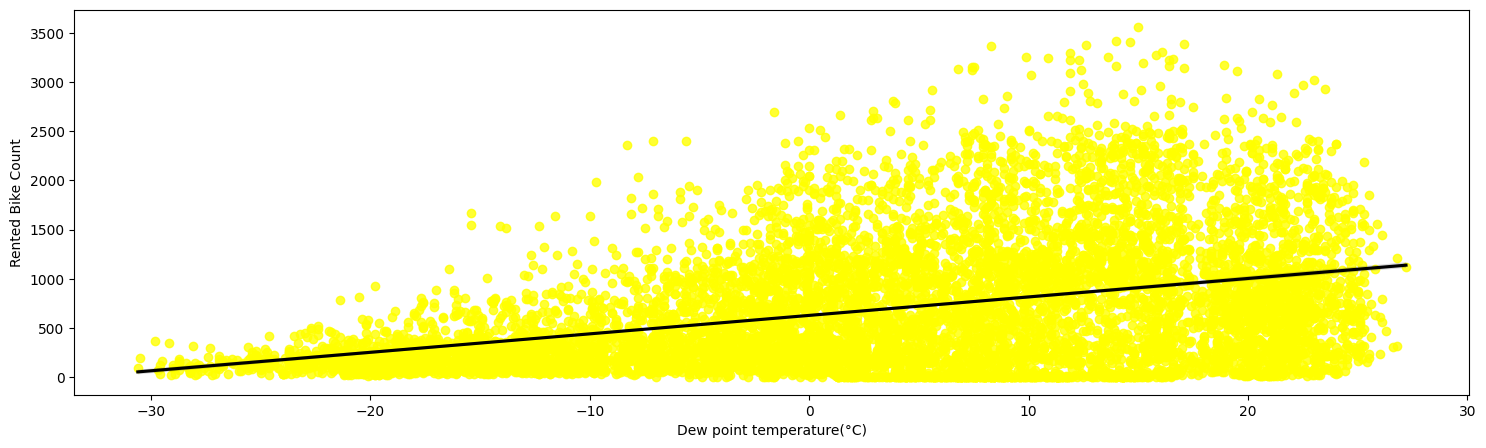

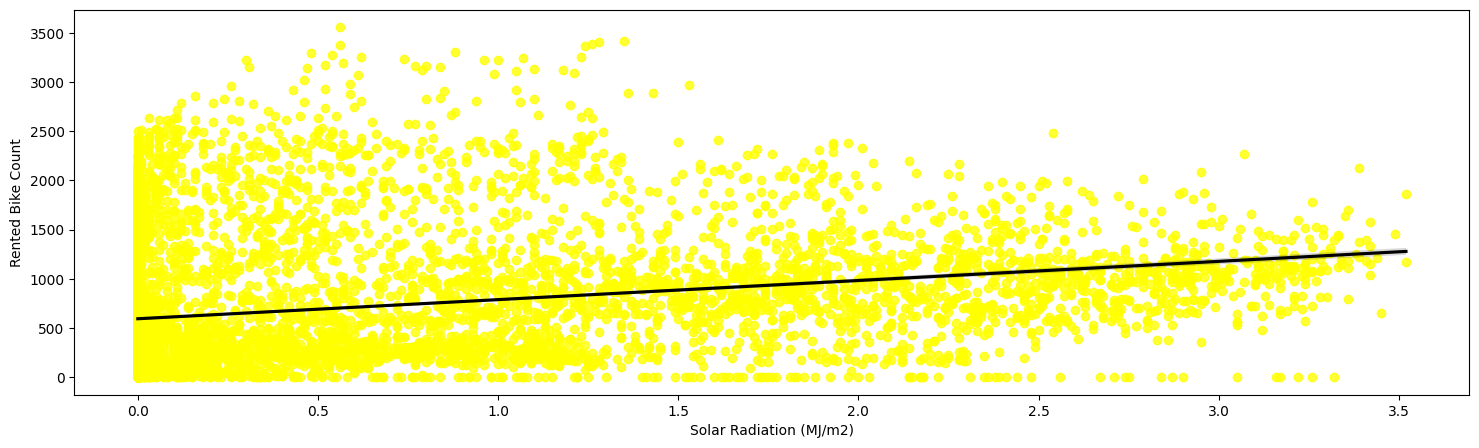

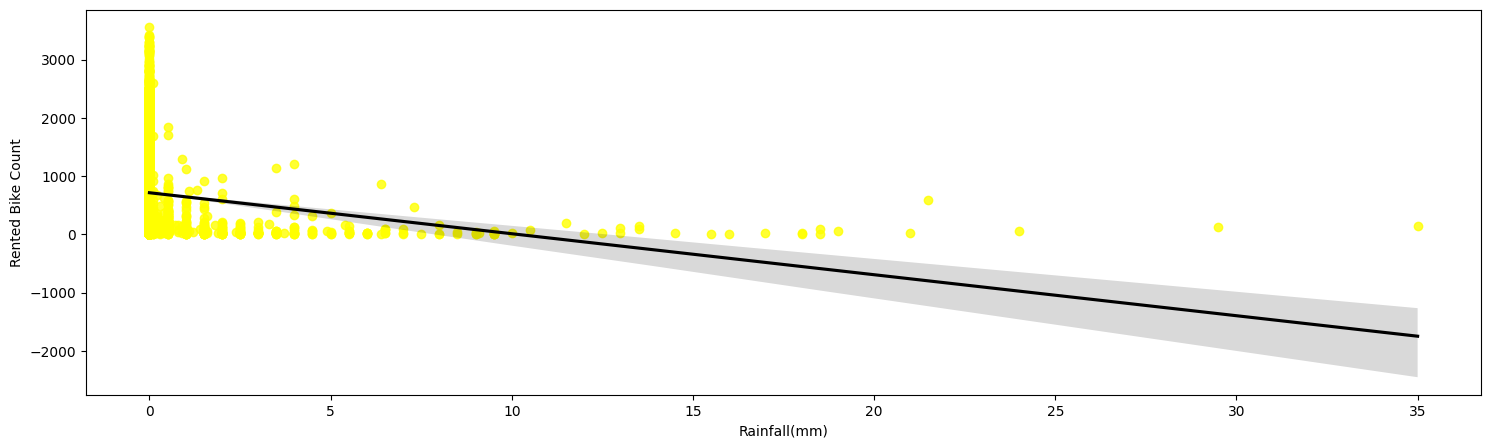

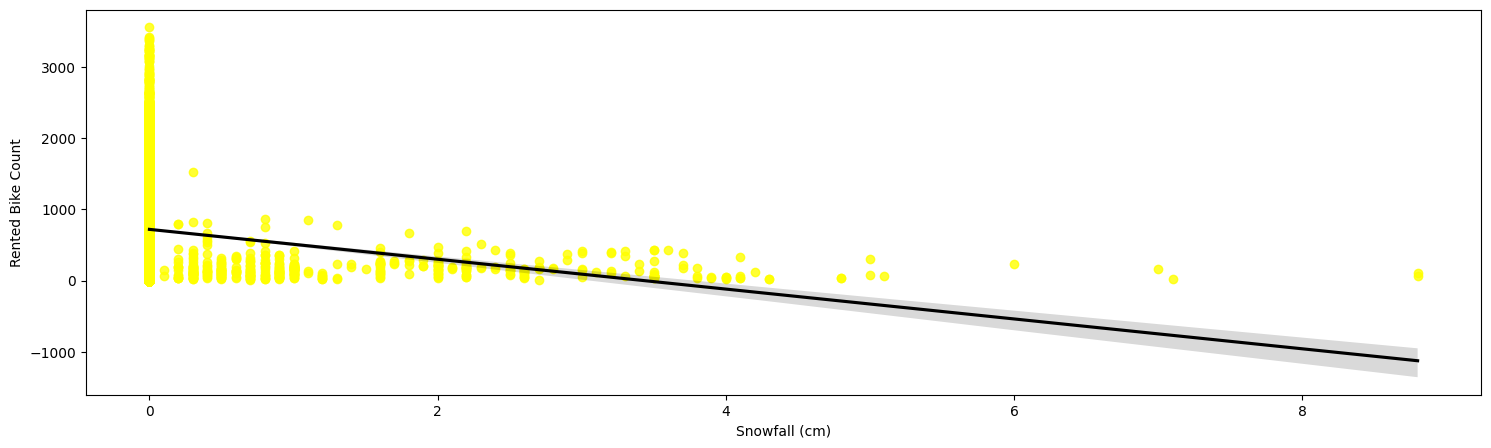

In [39]:
#printing  regression plot for all the numerical features.
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(18,5))
  sns.regplot(x = Bike_df[col], y =  Bike_df['Rented Bike Count'], scatter_kws={"color":'yellow'}, line_kws={"color":"black"} )



*  **From the regression graphs for all the numbers above, we see that the columns 'Temperature', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation' have a positive effect with the target variable.**

*   **This means that rental bikes are increasingly equipped with these features.**



*   **"Rain", "snowfall", "humidity" attributes are negatively related to the target variable, that is, when these attributes increase, bike rental decreases.**






### **Normalise Ratned Bike Count Column Data**

**Data normalization (also known as data prioritization) is an important part of data mining. This means modifying the data, i.e. converting the data into another format that allows it to be processed efficiently. The main purpose of data normalization is to reduce or even eliminate duplicate data.**

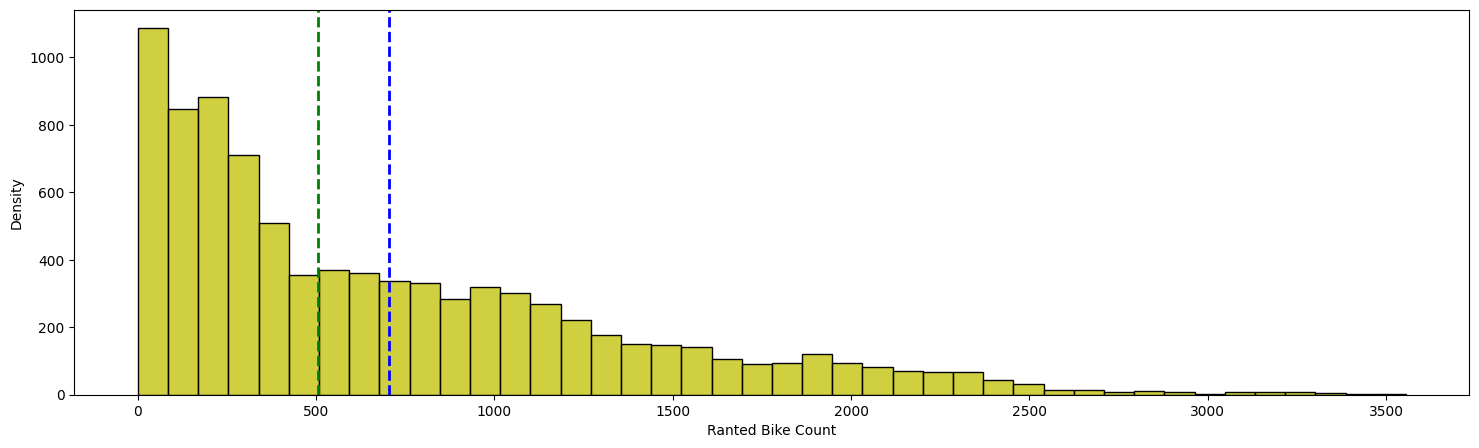

In [40]:
# Distribution plot of Ranted Bike Count
plt.figure(figsize=(18,5))
plt.xlabel('Ranted Bike Count')
plt.ylabel('Density')
ax=sns.histplot(Bike_df['Rented Bike Count'], color="y")
ax.axvline(Bike_df['Rented Bike Count'].mean(), color='blue', linestyle='dashed',linewidth=2)
ax.axvline(Bike_df['Rented Bike Count'].median(), color='green', linestyle='dashed',linewidth=2)
plt.show()

**The image above shows an error in the Rental Bike Count. Since the assumption of linear regression is that "the distribution of the variable must be normal", we need to do some work to normalize it.**

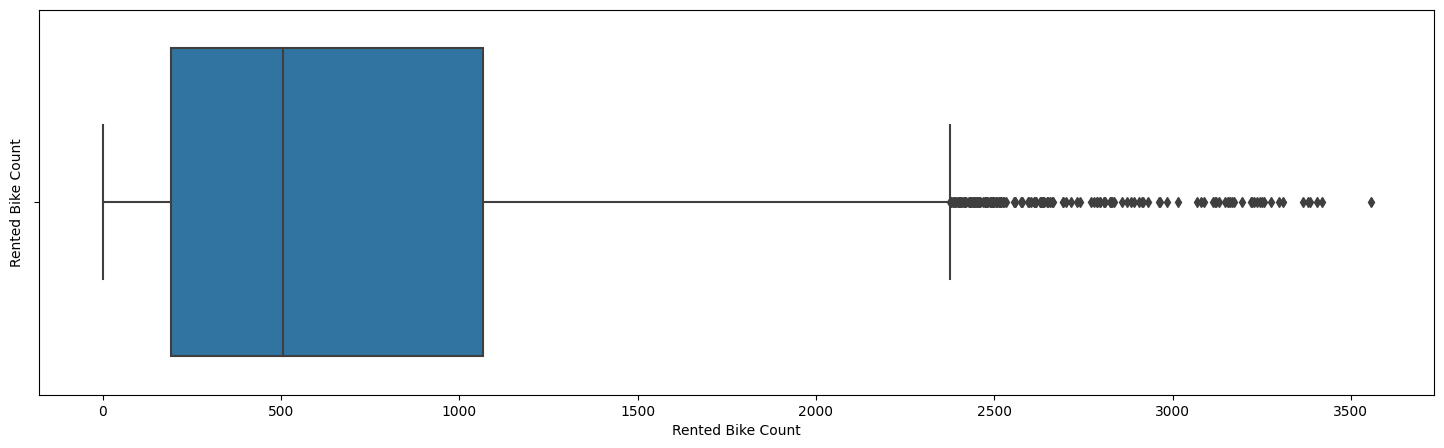

In [41]:
# Boxplot of Ranted Bike Count To Check Outliers
plt.figure(figsize=(18,5))
plt.ylabel('Rented Bike Count')
sns.boxplot(x= Bike_df['Rented Bike Count'])
plt.show()

**The above boxplot shows that we have defect outliers in Rented Bike Count Column**

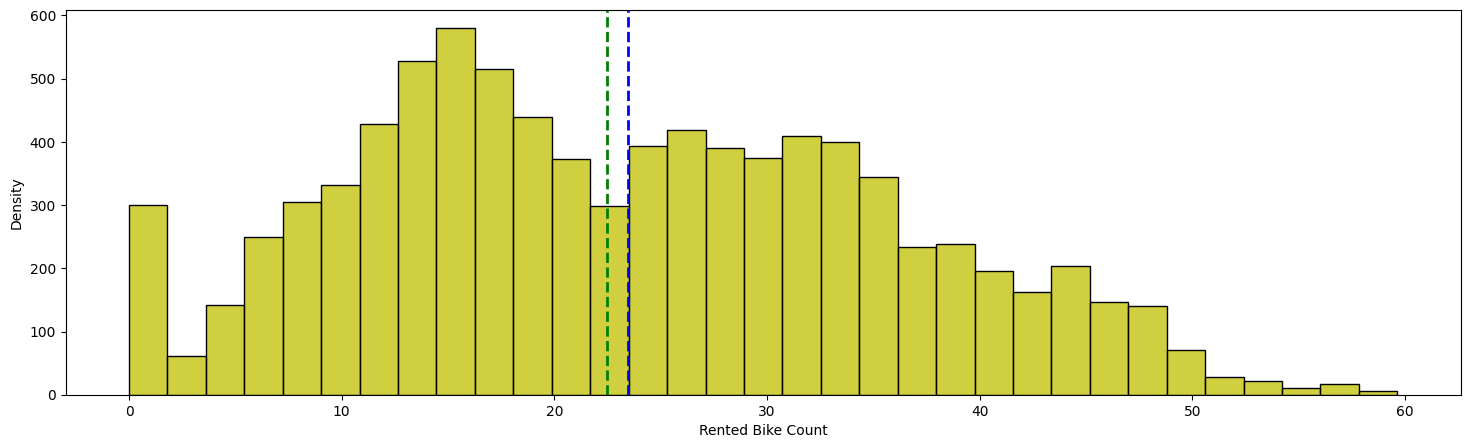

In [42]:
# Applying Square Root To Rented Bike Count to Improve Skewneww

plt.figure(figsize=(18,5))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.histplot(np.sqrt(Bike_df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(Bike_df['Rented Bike Count']).mean(), color='blue', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(Bike_df['Rented Bike Count']).median(), color='green', linestyle='dashed', linewidth=2)

plt.show()






*   **We have the general rule of using square root to keep skewed variables normal. Applying the square root to the number of skewed rental bikes, we get an almost normal distribution here.**




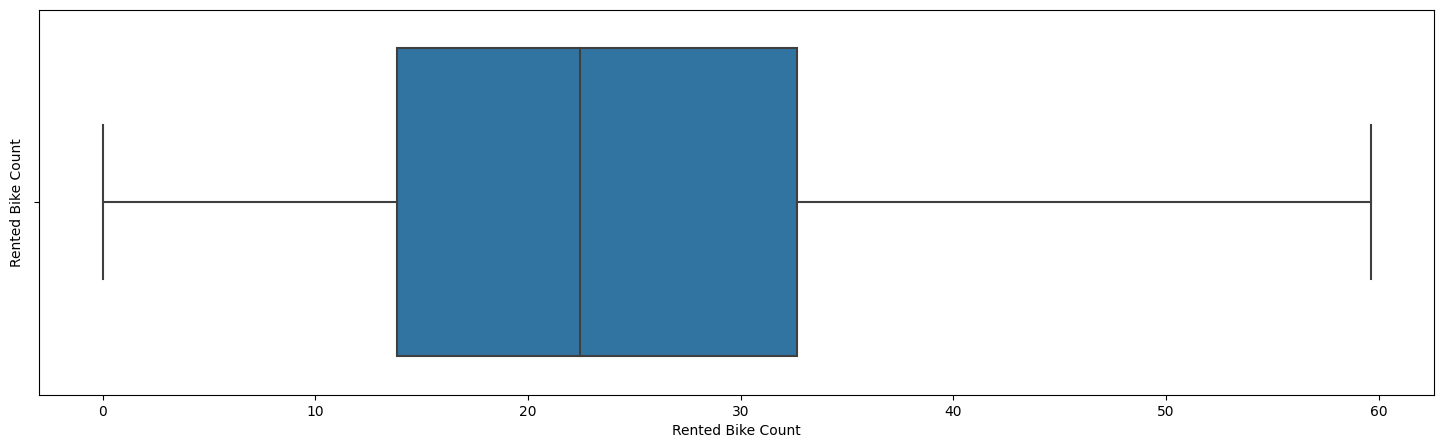

In [43]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(18,5))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(Bike_df['Rented Bike Count']))

plt.show()

In [44]:
Bike_df.corr()

Rented Bike Count  Temperature(°C)  Humidity(%)  \
Rented Bike Count                   1.000000         0.538558    -0.199780   
Temperature(°C)                     0.538558         1.000000     0.159371   
Humidity(%)                        -0.199780         0.159371     1.000000   
Wind speed (m/s)                    0.121108        -0.036252    -0.336683   
Visibility (10m)                    0.199280         0.034794    -0.543090   
Dew point temperature(°C)           0.379788         0.912798     0.536894   
Solar Radiation (MJ/m2)             0.261837         0.353505    -0.461919   
Rainfall(mm)                       -0.123074         0.050282     0.236397   
Snowfall (cm)                      -0.141804        -0.218405     0.108183   

                           Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count                  0.121108          0.199280   
Temperature(°C)                   -0.036252          0.034794   
Humidity(%)                       -0.336683         -0.543090   
Wind speed (m/s)                   1.000000          0.171507   
Visibility (10m)                   0.171507          1.000000   
Dew point temperature(°C)         -0.176486         -0.176630   
Solar Radiation (MJ/m2)            0.332274          0.149738   
Rainfall(mm)                      -0.019674         -0.167629   
Snowfall (cm)                     -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

**After applying square root Rented Bike Count Column, we find that there is no outliers present.**

### **Checking corelation between dependent and independent variable.**

<Axes: >

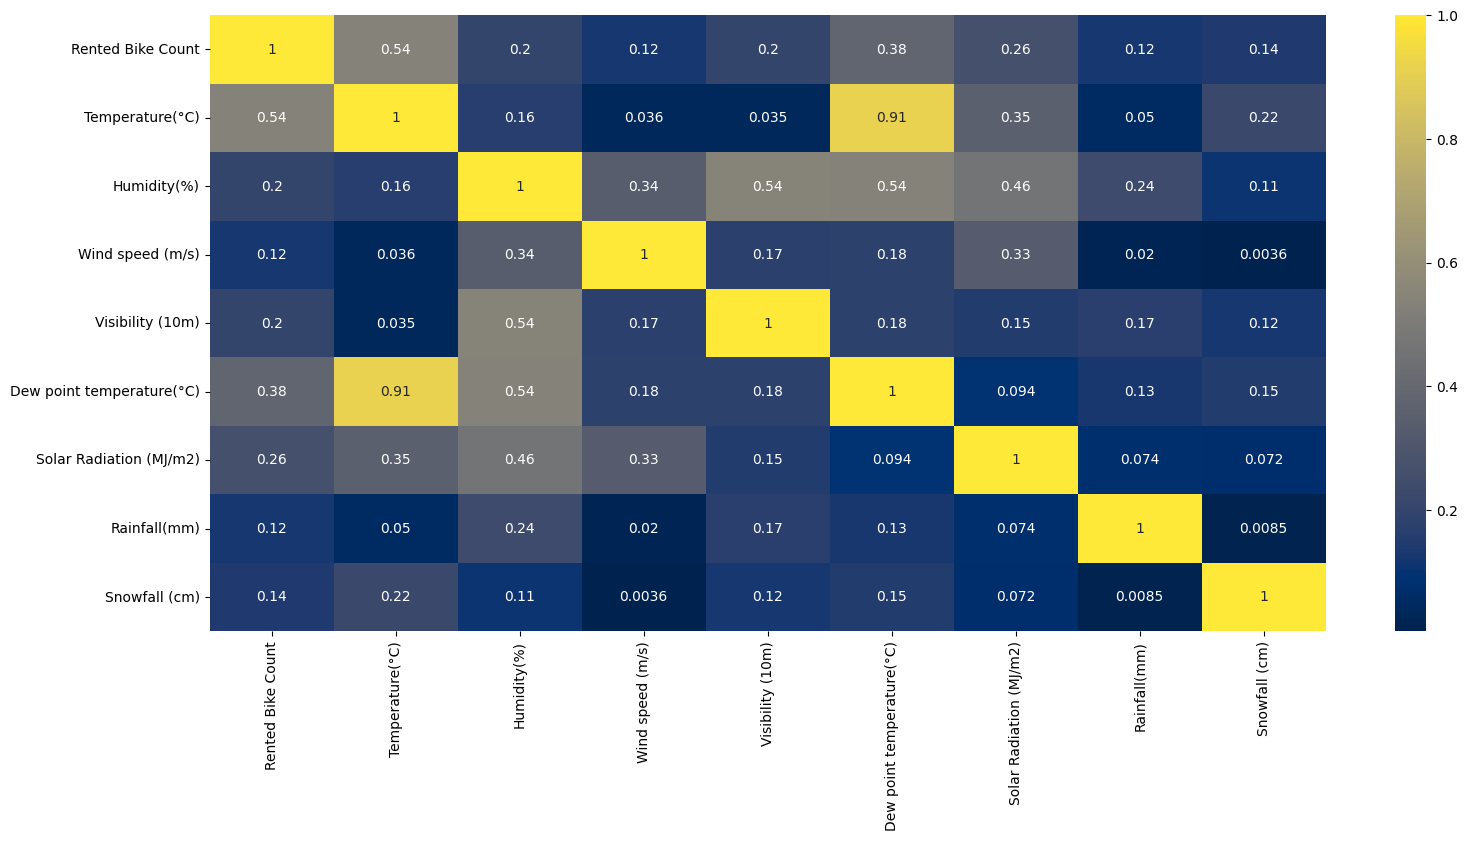

In [45]:
plt.figure(figsize=(18,8))
corr=Bike_df.corr()
sns.heatmap(data=abs(corr), annot=True, cmap='cividis')

### **We can obsserve on the heatmap that on the target variable line the most positively correlated variables to the rent are.**


*   **The Temperature**
*   **The Dew Point Temperature**

### **And most negatively correlated variables are: And most negative correlated variables are:**

*   **Rainfall**
*   **Humidity**





### **From the correlation heatmap above, we can see that there is a good correlation of 0.91 between the "Dark" column and the "Dew Point Temperature" column, so even if we drop this column, it will not affect our survey results. They have the same variation.So we can drop the column "Dew point temperature (°C)**

In [46]:
#drop the Dew point temperature column
Bike_df.drop('Dew point temperature(°C)',axis=1)

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254    0             -5.2           37               2.2   
1                   204    1             -5.5           38               0.8   
2                   173    2             -6.0           39               1.0   
3                   107    3             -6.2           40               0.9   
4                    78    4             -6.0           36               2.3   
...                 ...  ...              ...          ...               ...   
8755               1003   19              4.2           34               2.6   
8756                764   20              3.4           37               2.3   
8757                694   21              2.6           39               0.3   
8758                712   22              2.1           41               1.0   
8759                584   23              1.9           43               1.3   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 2000                      0.0           0.0            0.0   
1                 2000                      0.0           0.0            0.0   
2                 2000                      0.0           0.0            0.0   
3                 2000                      0.0           0.0            0.0   
4                 2000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755              1894                      0.0           0.0            0.0   
8756              2000                      0.0           0.0            0.0   
8757              1968                      0.0           0.0            0.0   
8758              1859                      0.0           0.0            0.0   
8759              1909                      0.0           0.0            0.0   

     Seasons     Holiday Functioning Day Month weekends_weekend  
0     Winter  No Holiday             Yes    12                0  
1     Winter  No Holiday             Yes    12                0  
2     Winter  No Holiday             Yes    12                0  
3     Winter  No Holiday             Yes    12                0  
4     Winter  No Holiday             Yes    12                0  
...      ...         ...             ...   ...              ...  
8755  Autumn  No Holiday             Yes    11                0  
8756  Autumn  No Holiday             Yes    11                0  
8757  Autumn  No Holiday             Yes    11                0  
8758  Autumn  No Holiday             Yes    11                0  
8759  Autumn  No Holiday             Yes    11                0  

[8760 rows x 14 columns]

In [47]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  Month                      8760 n

### **Creating dummy variables** 

**The dataset can have different types of values ​​and sometimes have categorical values. Therefore, we create dummy variables to be able to work effectively with categorical values.**

In [48]:
# Assign all categorical features to a variabes
categorical_features=list(Bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month',
       'weekends_weekend'],
      dtype='object')

### **One hot encoding**

**Gold coding allows for multiple representations of categorical information. Many machine learning algorithms cannot directly process categorical data. The category must be converted to a number. This is required for both input and output variables for classification.**

In [49]:
Bike_df_copy = Bike_df
def one_hot_encoding(data,column):
  data = pd.concat([data,pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
  data = data.drop([column],axis=1)
  return data

for col in categorical_features:
  Bike_df_copy = one_hot_encoding(Bike_df_copy , col)
Bike_df_copy.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Hour_1  ...  Month_4  Month_5  Month_6  \
0           0.0            0.0       0  ...        0        0        0   
1           0.0            0.0       1  ...        0        0        0   
2           0.0            0.0       0  ...        0        0        0   
3           0.0            0.0       0  ...        0        0        0   
4           0.0            0.0       0  ...        0        0        0   

   Month_7  Month_8  Month_9  Month_10  Month_11  Month_12  weekends_weekend_1  
0        0        0        0         0         0         1                   0  
1        0        0        0         0         0         1                   0  
2        0        0        0         0         0         1                   0  
3        0        0        0         0         0         1                   0  
4        0        0        0         0         0         1                   0  

[5 rows x 49 columns]

## **Model Training** 

##**Train test split for regression**

**Before fitting a model, divide the data empirically into training and testing. This means that some of the data will be used to train the model and some will be used to test our model's performance on unseen data. The ratio varies from person to person, for example 60:40, 70:30, 75:25, but the most common is 80:20 for training and testing, respectively. In this step, we will use the scikit-learn library to split the data into training and testing.**

In [50]:
# Assign the value in x and y
x = Bike_df_copy.drop(columns=['Rented Bike Count'] , axis=1)
y = np.sqrt(Bike_df_copy['Rented Bike Count'])



In [51]:
x.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0             -5.2           37               2.2              2000   
1             -5.5           38               0.8              2000   
2             -6.0           39               1.0              2000   
3             -6.2           40               0.9              2000   
4             -6.0           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   
3                      -17.6                      0.0           0.0   
4                      -18.6                      0.0           0.0   

   Snowfall (cm)  Hour_1  Hour_2  ...  Month_4  Month_5  Month_6  Month_7  \
0            0.0       0       0  ...        0        0        0        0   
1            0.0       1       0  ...        0        0        0        0   
2            0.0       0       1  ...        0        0        0        0   
3            0.0       0       0  ...        0        0        0        0   
4            0.0       0       0  ...        0        0        0        0   

   Month_8  Month_9  Month_10  Month_11  Month_12  weekends_weekend_1  
0        0        0         0         0         1                   0  
1        0        0         0         0         1                   0  
2        0        0         0         0         1                   0  
3        0        0         0         0         1                   0  
4        0        0         0         0         1                   0  

[5 rows x 48 columns]

In [52]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [53]:
#creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 48)
(2190, 48)


In [54]:
Bike_df_copy.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'weekends_weekend_1'],
      dtype='object')

 * **The mean square error (MSE) tells you how close the regression line is to the points. It does this by calculating the distance between points from the regression line (these distances are "errors") and squaring them.
It is called the squared error because you are looking for the mean of error states. The lower the MSE, the better the estimate.**

* **MSE formula = (1/n) * Σ(actual - forecast)2 Where:**
* **n = number of items,**
* **Σ = summation notation,**
* **Actual = original or observed y-value,**
* **Forecast = y-value from regression.**

* **The root mean square error (RMSE) is the standard deviation of the residuals (estimation error).**

* **Mean Absolute Error (MAE) is a metric used to evaluate regression models. ...where the error is the difference between the predicted value (the value predicted by our regression model) and the actual value of the variable.**

* **R-squared (R2) is a statistical test that shows the amount of variance in the variance explained by one or more variables in a regression model.**

* **Formula for R-Squared**
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned} 

*   **R 2= 1 - Total Variation Unexplained**

* **The adjusted R-square is a modified version of the R-squared adjusted for the number of predictors in the sample.**

### **RESRESSION**

**A regression model explains the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line**

**Linear regression uses the output method to model the relationship between independent variables and variables. In short, it is the most convenient line drawn between the values ​​of freedom and dependency. In the univariate case, the model is the same as the equation of a line with intersection and slope.**

$$ \text{y_pred} = \beta_0 + \beta_1x$$

**where** $$\beta_0 \text{ and } \beta_1$$ **are intercept and slope respectively**.

**In case of multiple features the formula translates into:**

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

**where x_1,x_2,x_3 are the features values and **

$$\beta_0,\beta_1,\beta_2.....$$

 **are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.**

 **Gradient descent is a technique in which an algorithm attempts to improve automatic loss of function. Unemployment is nothing more than the difference between the actual value and the predicted value (also called error or residual). There are many types of unemployment, but this is the simplest. The sum of all observations gives the unemployment rate.**

**The task of gradient descent is to update the parameters until the function value i decreases.That is, the global minimum has been reached. It uses the "alpha" hyperparameter to weight the value of the function and determine how long a step will take. Alpha is called the learning rate. It is always necessary to maintain a positive value of alpha because high and low alpha cause gradient drop or get stuck at a local minimum.
Before using the algorithm, some basic assumptions need to be met. these**

1. **No multicollinearity in the dataset.**

2. **Independent variables should show linear relationship with dv.**

3. **Residual mean should be 0 or close to 0.**

4. **There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.**


**Let us now implement our first model.
We will be using LinearRegression from scikit library.**

In [55]:
# Import the package 
from sklearn.linear_model import LinearRegression
reg = LinearRegression ().fit(X_train, y_train)

In [56]:
# Check the score 
reg.score(X_train, y_train)

0.7739500178860266

In [57]:
# Check the Coefficient
reg.coef_

array([ 1.00716430e-01, -2.37171095e-01, -3.83514579e-02,  9.89292762e-04,
        4.48649754e-01,  1.10233082e+00, -1.42620210e+00,  1.97988853e-02,
       -2.02001246e+00, -4.95378959e+00, -7.24401536e+00, -9.50159767e+00,
       -9.04615325e+00, -3.99911519e+00,  2.25436221e+00,  7.48518526e+00,
        1.08263864e+00, -3.47160329e+00, -3.60398174e+00, -2.84952971e+00,
       -2.96884880e+00, -3.08067403e+00, -1.73357996e+00,  3.00563252e-01,
        4.01127439e+00,  1.03848640e+01,  6.87256706e+00,  6.09265423e+00,
        6.19988288e+00,  5.03861312e+00,  1.45957498e+00, -4.03596659e-01,
       -1.45360507e+00, -4.68852171e+00,  3.49141047e+00,  2.83549564e+01,
       -6.62050082e-01, -1.51944633e+00, -4.35688691e-01,  1.55153836e+00,
        4.42646814e+00, -1.82821742e+00, -4.05185579e+00,  4.72139757e-01,
        3.29429867e+00,  2.77928502e+00,  2.13133779e+00, -1.34812601e+00])

In [58]:
# get the X_train and X-test value
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

In [59]:
# import the package 
from sklearn.metrics import mean_squared_error

#Calculate MSE
MSE_lr= mean_squared_error((y_train),(y_pred_train))
print("MSE:" , MSE_lr)

#Calculate RMSE
RMSE_lr = np.sqrt(MSE_lr)
print("RMSE:" , RMSE_lr)

#Calculate MAE
MAE_lr = mean_absolute_error(y_train, y_pred_train)
print("MAE:",MAE_lr)


#import the package
from sklearn.metrics import r2_score

#Calculate r2 and adjussted r2
r2_lr=r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr=(1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))
print("Adjusted R2:",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1))/((X_test.shape[1]-1) ))

MSE: 34.80959018818959
RMSE: 5.8999652700833405
MAE: 4.444157962699084
R2 : 0.7739500178860266
Adjusted R2: -9.528157677606124


**It looks like our r2 value is 0.77, which means our model is able to capture most of the differences in the data. Let's save this in the comparison file for later comparison.**

In [60]:
# storing the test set metrics value in a dataframe for later comparison

dict2={'Model':'Linear regression',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((MSE_lr),3),
       'Adjuested R2':round((Adjusted_R2_lr),2)
}

test_df = pd.DataFrame(dict2,index=[1])

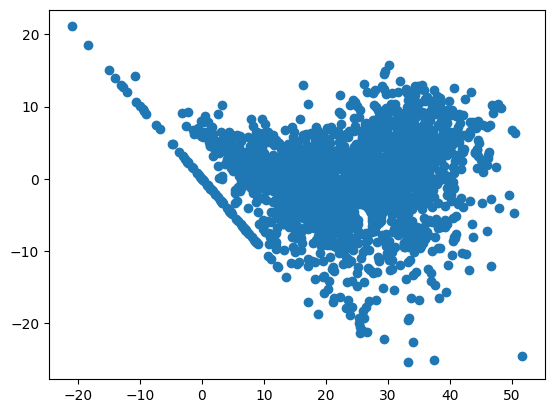

In [61]:
# Hetroscadcity 
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

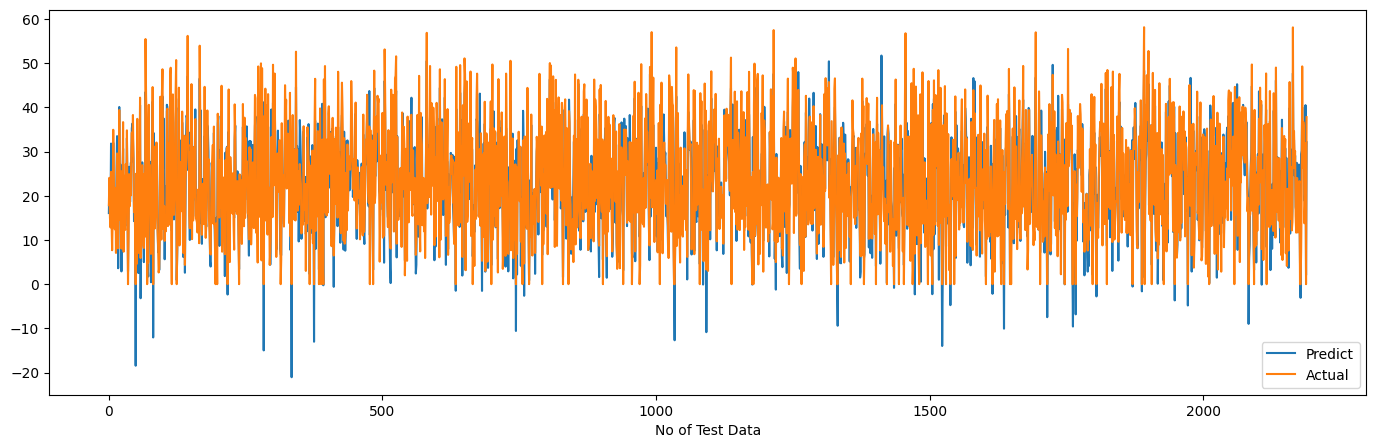

In [62]:
#plot the figure
plt.figure(figsize=(17,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predict","Actual"])
plt.xlabel('No of Test Data')
plt.show()


##**Lasso Regression** 

In [63]:
# Create an intances of lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0, max_iter = 3000)

# Fit the Lasso Model
lasso.fit(X_train, y_train)

# Create the model score
print(lasso.score(X_test, y_test),lasso.score(X_train, y_train))



0.387939387361117 0.40607960378573027


In [64]:
# get the X_train and X-test value
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error

#calculate MSE
MSE_l = mean_squared_error((y_train),(y_pred_train_lasso))
print("MSE:",MSE_l)

#calculate RMSE
RMSE_l = np.sqrt(MSE_l)
print("RMSE:",RMSE_l)

# Calculate MAE
MAE_l = mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE:",MAE_l)

from sklearn.metrics import r2_score
r2_l = r2_score(y_train, y_pred_train_lasso)
print("R2:",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]/(X_test.shape[0]-X_test.shape[1]-1) )) )
print("Adjusted R2:",(1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]/(X_test.shape[0]-X_test.shape[1]-1)) ) ))



MSE: 91.45820496549345
RMSE: 9.563378323871405
MAE: 7.242373211166085
R2: 0.40607960378573027
Adjusted R2: 0.39248684366686093


**It looks like our r2 score is 0.40, which means our model didn't capture most of the variance in the data. Let's save this in the comparison file for later comparison.**

In [66]:
dict1={'Model':'Lasso regression',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((MSE_l),3),
       'Adjuested R2':round((Adjusted_R2_lr),2)
}

training_df=pd.DataFrame(dict1,index=[1])

In [67]:
from sklearn.metrics import  mean_squared_error

# Clalculate MSE
MSE_l = mean_squared_error(y_test, y_pred_test_lasso)
print("MSE:",MSE_l)

# Calculate RMSE
RMSE_l = np.sqrt(MSE_l)
print("RMSE:",RMSE_l)

# Calculate MAE
MAE_l = mean_absolute_error(y_test,y_pred_test_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score

#Calculate r2 and adjusted r2
r2_l = r2_score((y_test),(y_pred_test_lasso))
print("R2:",r2_l)
Adjusted_R2_l= (1-(1-r2_score((y_test),(y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))
print("Adjusted R2:" ,1-(1-r2_score((y_test),(y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 96.68501360772724
RMSE: 9.832853787569876
MAE : 7.4419572551489805
R2: 0.387939387361117
Adjusted R2: 0.3742173371945283


**the r2_score of the test set is 0.38. This means that our linear model does not perform well on the data. Let's try to visualize our residuals to see if there is hetero variance (even or not dispersed).**

In [68]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((MSE_lr),3),
       'Adjuested R2':round((Adjusted_R2_lr),2)
}

test_df = pd.DataFrame(dict2,index=[1])

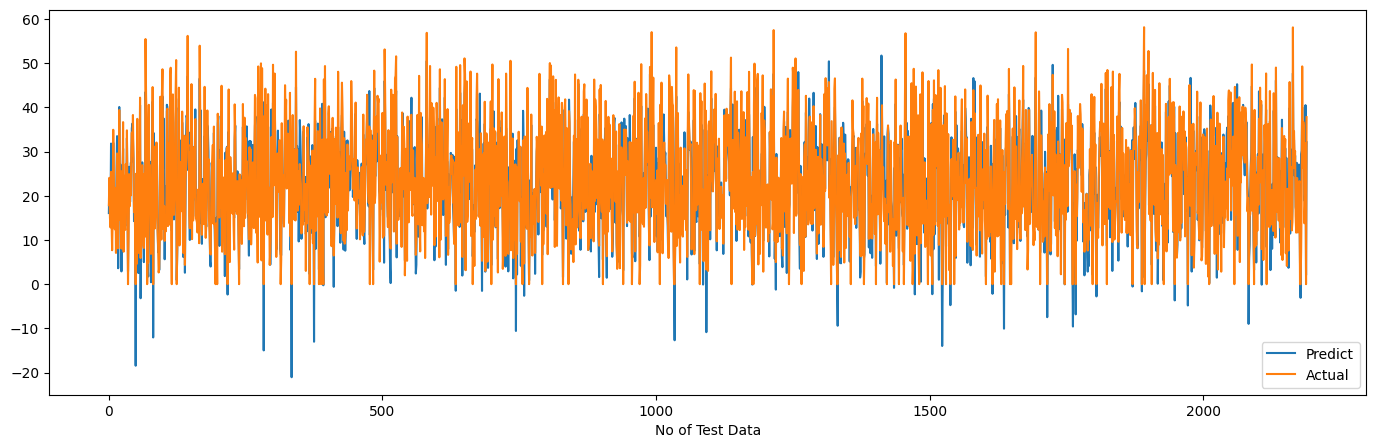

In [69]:
#plot the figure
plt.figure(figsize=(17,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predict","Actual"])
plt.xlabel('No of Test Data')
plt.show()

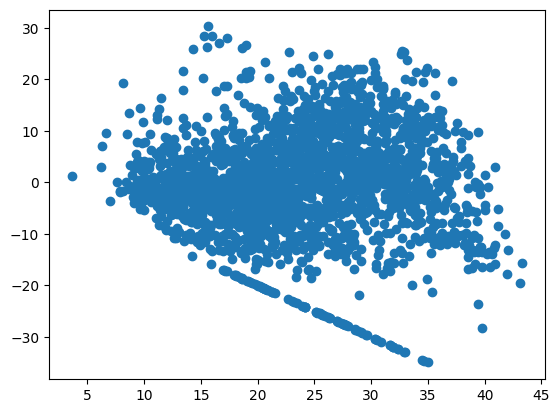

In [70]:
# Hetroscadcity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

##**Ridge Regression**

In [71]:
# import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha = 0.1)

In [72]:
#Fit the Model
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [73]:
#Check the Score
ridge.score(X_train, y_train)

0.7739499413712558

In [74]:
#Get the X_train and X-test value
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [75]:
# import the packages
from sklearn.metrics import mean_squared_error

#calculate MSE
MSE_r=mean_squared_error((y_train),(y_pred_train_ridge))
print("MSE :",MSE_r)

#Calculate RMSE
RMSE_r = np.sqrt(MSE_r)
print("RMSE:",RMSE_r)

#Calculate MAE 
MAE_r = mean_absolute_error (y_train, y_pred_train_ridge)
print("MAE:",MAE_r)

#import package
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r=r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train,y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))
print("Adjusted R2:",1-(1-r2_score(y_train,y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ))

MSE : 34.809601970751054
RMSE: 5.899966268611292
MAE: 4.4442304538230974
R2 : 0.7739499413712558
Adjusted R2: 0.7688820278662676


**It seems that our r2 score is 0.77, which means our model was able to capture most of the data variables. Let's save this in the comparison file for later comparison.**

In [76]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((MSE_r),3),
       'Adjuested R2':round((Adjusted_R2_r),2)
}

training_df=pd.DataFrame(dict1,index=[1])

In [77]:
# Import the package
from sklearn.metrics import mean_squared_error

#Calculate MSE
MSE_r = mean_squared_error(y_test,y_pred_test_ridge)
print("MSE :",MSE_r)

#Calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

#Calculate MAE
MAE_r=mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE:",MAE_r)

#import the package
from sklearn.metrics import r2_score

#Calculate r2 and adjusted r2
r2_r = r2_score((y_test),(y_pred_test_ridge))
print("R2:",r2_r)
Adjusted_R2_r = (1-(1-r2_score((y_test),(y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )
print("Adjusted R2 :",1-(1-r2_score((y_test),(y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )

MSE : 33.08692557699116
RMSE : 5.752123571081481
MAE: 4.373424447304692
R2: 0.7905445406342496
Adjusted R2 : 0.785848668588684


**the r2_score of the test set is 0.78. This means that our linear model performs well on the data. Let's try to visualize our residuals to see if there is hetero variance (even or not dispersed).**

In [78]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((MSE_r),3),
       'Adjuested R2':round((Adjusted_R2_r),2)
}

test_df = pd.DataFrame(dict2,index=[1])

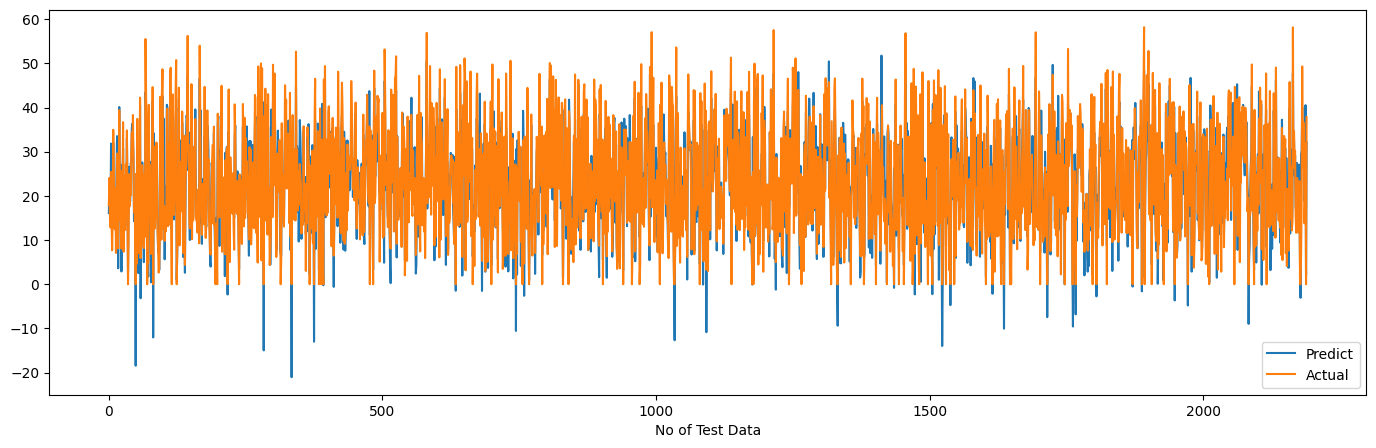

In [79]:
#plot the figure
plt.figure(figsize=(17,5))
plt.plot(y_pred_test_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predict","Actual"])
plt.xlabel('No of Test Data')
plt.show()

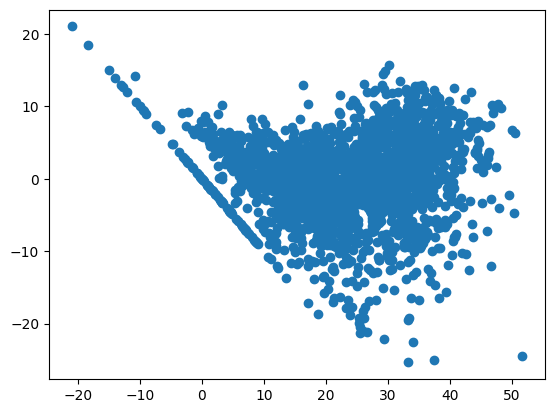

In [80]:
# Hetroscadcity
plt.scatter((y_pred_test_ridge),(y_test-y_pred_test_ridge))

## **Elastic Net Regression**

 Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [81]:
# import the package
from sklearn.linear_model import ElasticNet
#a* L1 + b* L2
#alpha = a + b and l1_ratio = a/(a+b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [82]:
#Fit The Model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [83]:
#check the score
elasticnet.score(X_train, y_train)

0.6271513362993816

In [84]:
# get the X_train and X-test Value
y_pred_train_en=elasticnet.predict(X_train) 
y_pred_test_en=elasticnet.predict(X_test)


In [85]:
# Import the package
from sklearn.metrics import mean_squared_error

#calculate MSE
MSE_e=mean_squared_error((y_train),(y_pred_train_en))
print("MSE:",MSE_e)

#Calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

#Calculate MAE
MAE_e=mean_absolute_error(y_train, y_pred_train_en)
print("MAE:",MAE_e)

#import the package
from sklearn.metrics import r2_score

#Calculate r2 and adjusted r2
r2_e = r2_score((y_train),(y_pred_train_en))
print("R2:",r2_e)
Adjusted_R2_e = (1-(1-r2_score((y_test),(y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )
print("Adjusted R2 :",1-(1-r2_score((y_test),(y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )



MSE: 57.41521881248738
RMSE : 7.577283075911008
MAE: 5.765036863516414
R2: 0.6271513362993816
Adjusted R2 : 0.6156707806371192


**It looks like our r2 score is 0.62, which means our model was able to capture most of the differences in the data. Let's save this in the comparison file for later comparison.**

In [86]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((MSE_r),3),
       'Adjuested R2':round((Adjusted_R2_r),2)
}

training_df=pd.DataFrame(dict1,index=[1])

In [87]:
# Import the package
from sklearn.metrics import mean_squared_error


#calculate MSE
MSE_e=mean_squared_error((y_test),(y_pred_test_en))
print("MSE:",MSE_e)


#Calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

#Calculate MAE
MAE_e=mean_absolute_error(y_test, y_pred_test_en)
print("MAE:",MAE_e)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



MSE: 59.379842256029995
RMSE : 7.705831704367154
MAE: 5.846073183056352
R2 : 0.6240982829347064
Adjusted R2 : 0.6156707806371192


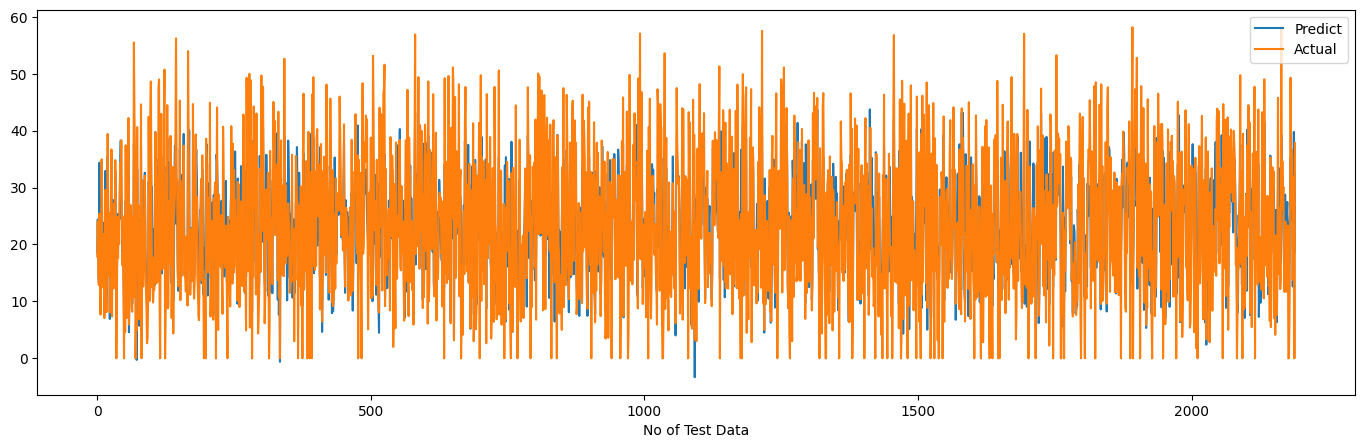

In [88]:
#plot the figure
plt.figure(figsize=(17,5))
plt.plot(y_pred_test_en)
plt.plot(np.array(y_test))
plt.legend(["Predict","Actual"])
plt.xlabel('No of Test Data')
plt.show()


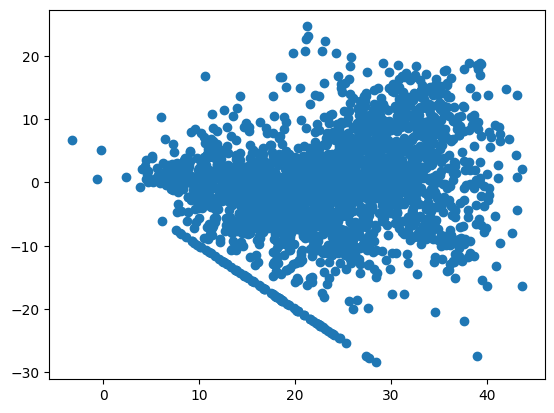

In [89]:
# Hetroscadcity
plt.scatter((y_pred_test_en),(y_test-y_pred_test_en))

## **Decision Tree**

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [90]:
#import decision tree packages
from sklearn.tree import DecisionTreeRegressor

# Create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

# fitting Xtrain ytrain
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [91]:
# # check score on train dataset
D_tree.score(X_train,y_train)

0.7959917088557493

In [92]:
# check score on the dataset.
D_tree.score(X_test,y_test)

0.7538176258147331

In [93]:
#  predicting y_train_predictions from  X train values
y_pred_train=D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred=D_tree.predict(X_test)
     

In [94]:
# Evaluation of ttraning data set

# calculate mean absoluate error.
MAE = mean_absolute_error(y_train,y_pred_train)
print(MAE)

# Calculate Mean square error
MSE=mean_squared_error(y_train,y_pred_train)
print(MSE)

# Calculate root mean squared error
RMSE=np.sqrt(MSE)
print(RMSE)

# calculate R2 score 
R2=r2_score(y_train,y_pred_train)
print(R2)

3.9434690945845716
31.415375233888373
5.604942036621643
0.7959917088557493


In [95]:
# creating dictionary of decision tree results(Train dataset)
train_dict={
  'Model':"Decision Tree Regressor-GridSearchCV",
  'MAE':round(MAE,4),
  'MSE':round(MAE,4),
  'RMSE':round(MAE,4),
  'R2_score':round(MAE,4)

}


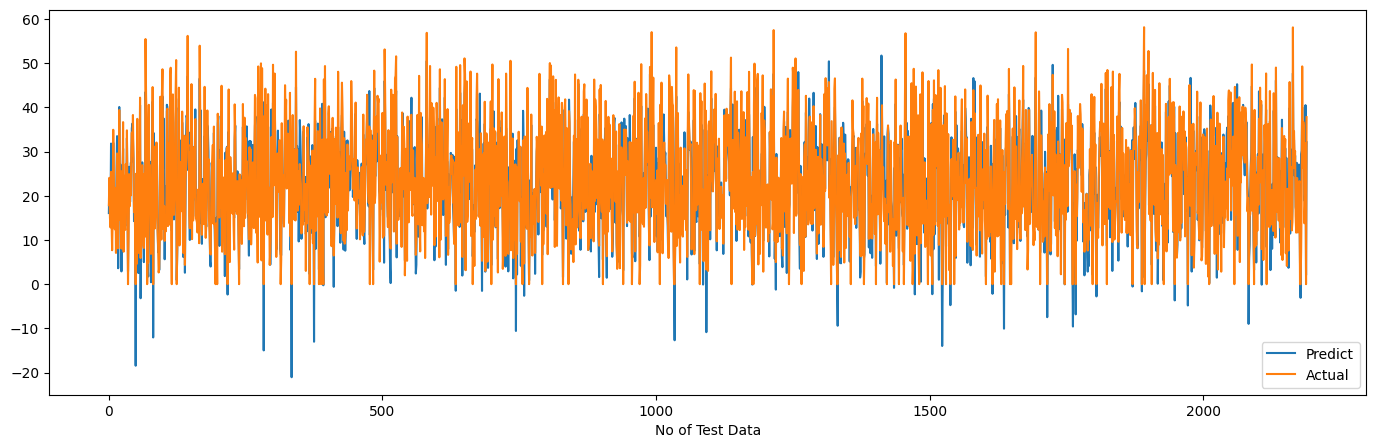

In [96]:
#plot the figure
plt.figure(figsize=(17,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predict","Actual"])
plt.xlabel('No of Test Data')
plt.show()




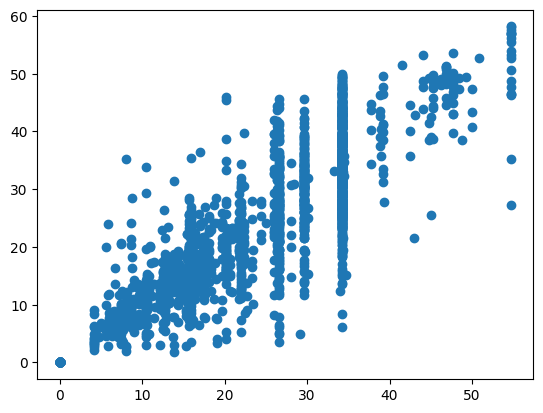

In [97]:
# Hetroscadcity
plt.scatter(y_pred,y_test)

##**Random Forest**

Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

In [98]:
# import the packages 
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [99]:
# making predictions on train and test data
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [100]:
# import the package
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

# claculate MSE
MSE_rf=mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# Calculate RMSE 
RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

# Calculate MAE
MAE_rf = mean_absolute_error(y_train, y_pred_train_r)
print("MAE ;" ,MAE_rf)

#import the package
from sklearn.metrics import r2_score

#Calculate r2 and adjusted r2
r2_rf = r2_score(y_train ,y_pred_train_r)
print("R2:",r2_rf)
Adjusted_R2_rf = (1-(1-r2_score(y_train ,y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )
print("Adjusted R2 :",1-(1-r2_score(y_train,y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )




Model Score: 0.9894767701137084
MSE : 1.620479313345977
RMSE : 1.2729804842753785
MAE ; 0.8116193090467638
R2: 0.9894767701137084
Adjusted R2 : 0.9892408452960801


In [101]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((MSE_rf),3),
       'Adjuested R2':round((Adjusted_R2_rf),2)
}

training_df=pd.DataFrame(dict1,index=[1])

In [102]:
# import the package
from sklearn.metrics import mean_squared_error

# claculate MSE
MSE_rf=mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# Calculate RMSE 
RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

# Calculate MAE
MAE_rf = mean_absolute_error(y_test, y_pred_test_r)
print("MAE ;" ,MAE_rf)

#import the package
from sklearn.metrics import r2_score

#Calculate r2 and adjusted r2
r2_rf = r2_score(y_test ,y_pred_test_r)
print("R2:",r2_rf)
Adjusted_R2_rf = (1-(1-r2_score((y_test),(y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )
print("Adjusted R2 :",1-(1-r2_score((y_test),(y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1) ) )

MSE : 12.894924630289397
RMSE : 3.5909503798144295
MAE ; 2.2300878812649656
R2: 0.9183691952387917
Adjusted R2 : 0.785848668588684


**The r2_ score of the test is 0.91. This means that our linear model performs well on the data. Let's try to visualize our residuals to see if there is heteroscedasticity (equal or not different).**

In [103]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((MSE_rf),3),
       'Adjuested R2':round((Adjusted_R2_rf),2)
}

training_df=pd.DataFrame(dict1,index=[1])

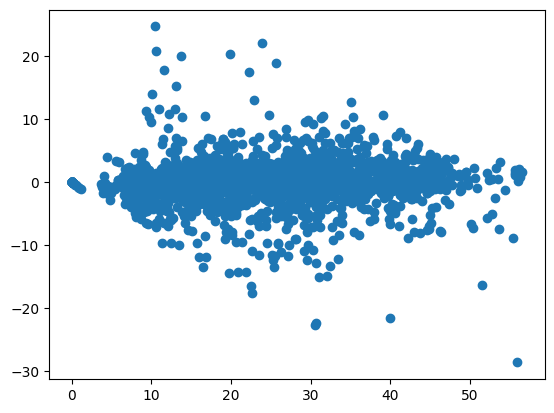

In [104]:
# Hetroscadacity 
plt.scatter((y_pred_test_r),(y_test-(y_pred_test_r)))

In [105]:
rf_model.feature_importances_

array([3.04680310e-01, 1.52546792e-01, 1.12178425e-02, 1.11093603e-02,
       1.94436253e-02, 3.13764199e-02, 3.20816059e-02, 1.47324680e-03,
       4.75939664e-03, 1.26883253e-02, 2.04457660e-02, 2.87105080e-02,
       2.52241645e-02, 7.86139649e-03, 4.02209802e-03, 1.48384045e-02,
       9.33347754e-04, 1.84346463e-03, 9.01830985e-04, 2.57404247e-04,
       2.56894805e-04, 3.85203967e-04, 1.44302561e-03, 3.44987699e-03,
       1.03534036e-02, 3.08168955e-02, 1.72890645e-02, 1.27592913e-02,
       1.33082500e-02, 1.08825252e-02, 4.45839879e-03, 3.68187757e-03,
       8.42241670e-04, 8.98203618e-03, 3.87884995e-03, 1.51692532e-01,
       2.63231011e-04, 3.90949601e-03, 1.28232677e-03, 1.28287621e-03,
       2.05767616e-03, 5.28692451e-04, 1.29530902e-03, 7.99128100e-04,
       2.61156170e-03, 5.37850936e-03, 7.45958074e-04, 1.89495579e-02])

In [106]:
importances = rf_model.feature_importances_


importance_dict = {'Feature':list(X_train.columns),
                    'Feature Importance': importances}

importance_df = pd.DataFrame(importance_dict)


In [107]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [108]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0             Temperature(°C)                0.30
35        Functioning Day_Yes                0.15
1                 Humidity(%)                0.15
25                    Hour_18                0.03
5     Solar Radiation (MJ/m2)                0.03
6                Rainfall(mm)                0.03
12                     Hour_5                0.03
11                     Hour_4                0.03
10                     Hour_3                0.02
26                    Hour_19                0.02
47         weekends_weekend_1                0.02
4   Dew point temperature(°C)                0.02
9                      Hour_2                0.01
45                   Month_11                0.01
2            Wind speed (m/s)                0.01
33             Seasons_Winter                0.01
28                    Hour_21                0.01
27                    Hour_20                0.01
3            Visibility (10m)                0.01
29                    Hour_22                0.01
24                    Hour_17                0.01
13                     Hour_6                0.01
15                     Hour_8                0.01
14                     Hour_7                0.00
46                   Month_12                0.00
44                   Month_10                0.00
43                    Month_9                0.00
42                    Month_8                0.00
41                    Month_7                0.00
40                    Month_6                0.00
39                    Month_5                0.00
38                    Month_4                0.00
37                    Month_3                0.00
36                    Month_2                0.00
20                    Hour_13                0.00
21                    Hour_14                0.00
32             Seasons_Summer                0.00
31             Seasons_Spring                0.00
30                    Hour_23                0.00
8                      Hour_1                0.00
16                     Hour_9                0.00
17                    Hour_10                0.00
18                    Hour_11                0.00
19                    Hour_12                0.00
7               Snowfall (cm)                0.00
23                    Hour_16                0.00
22                    Hour_15                0.00
34         Holiday_No Holiday                0.00

In [109]:
# Fit The Model
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [110]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

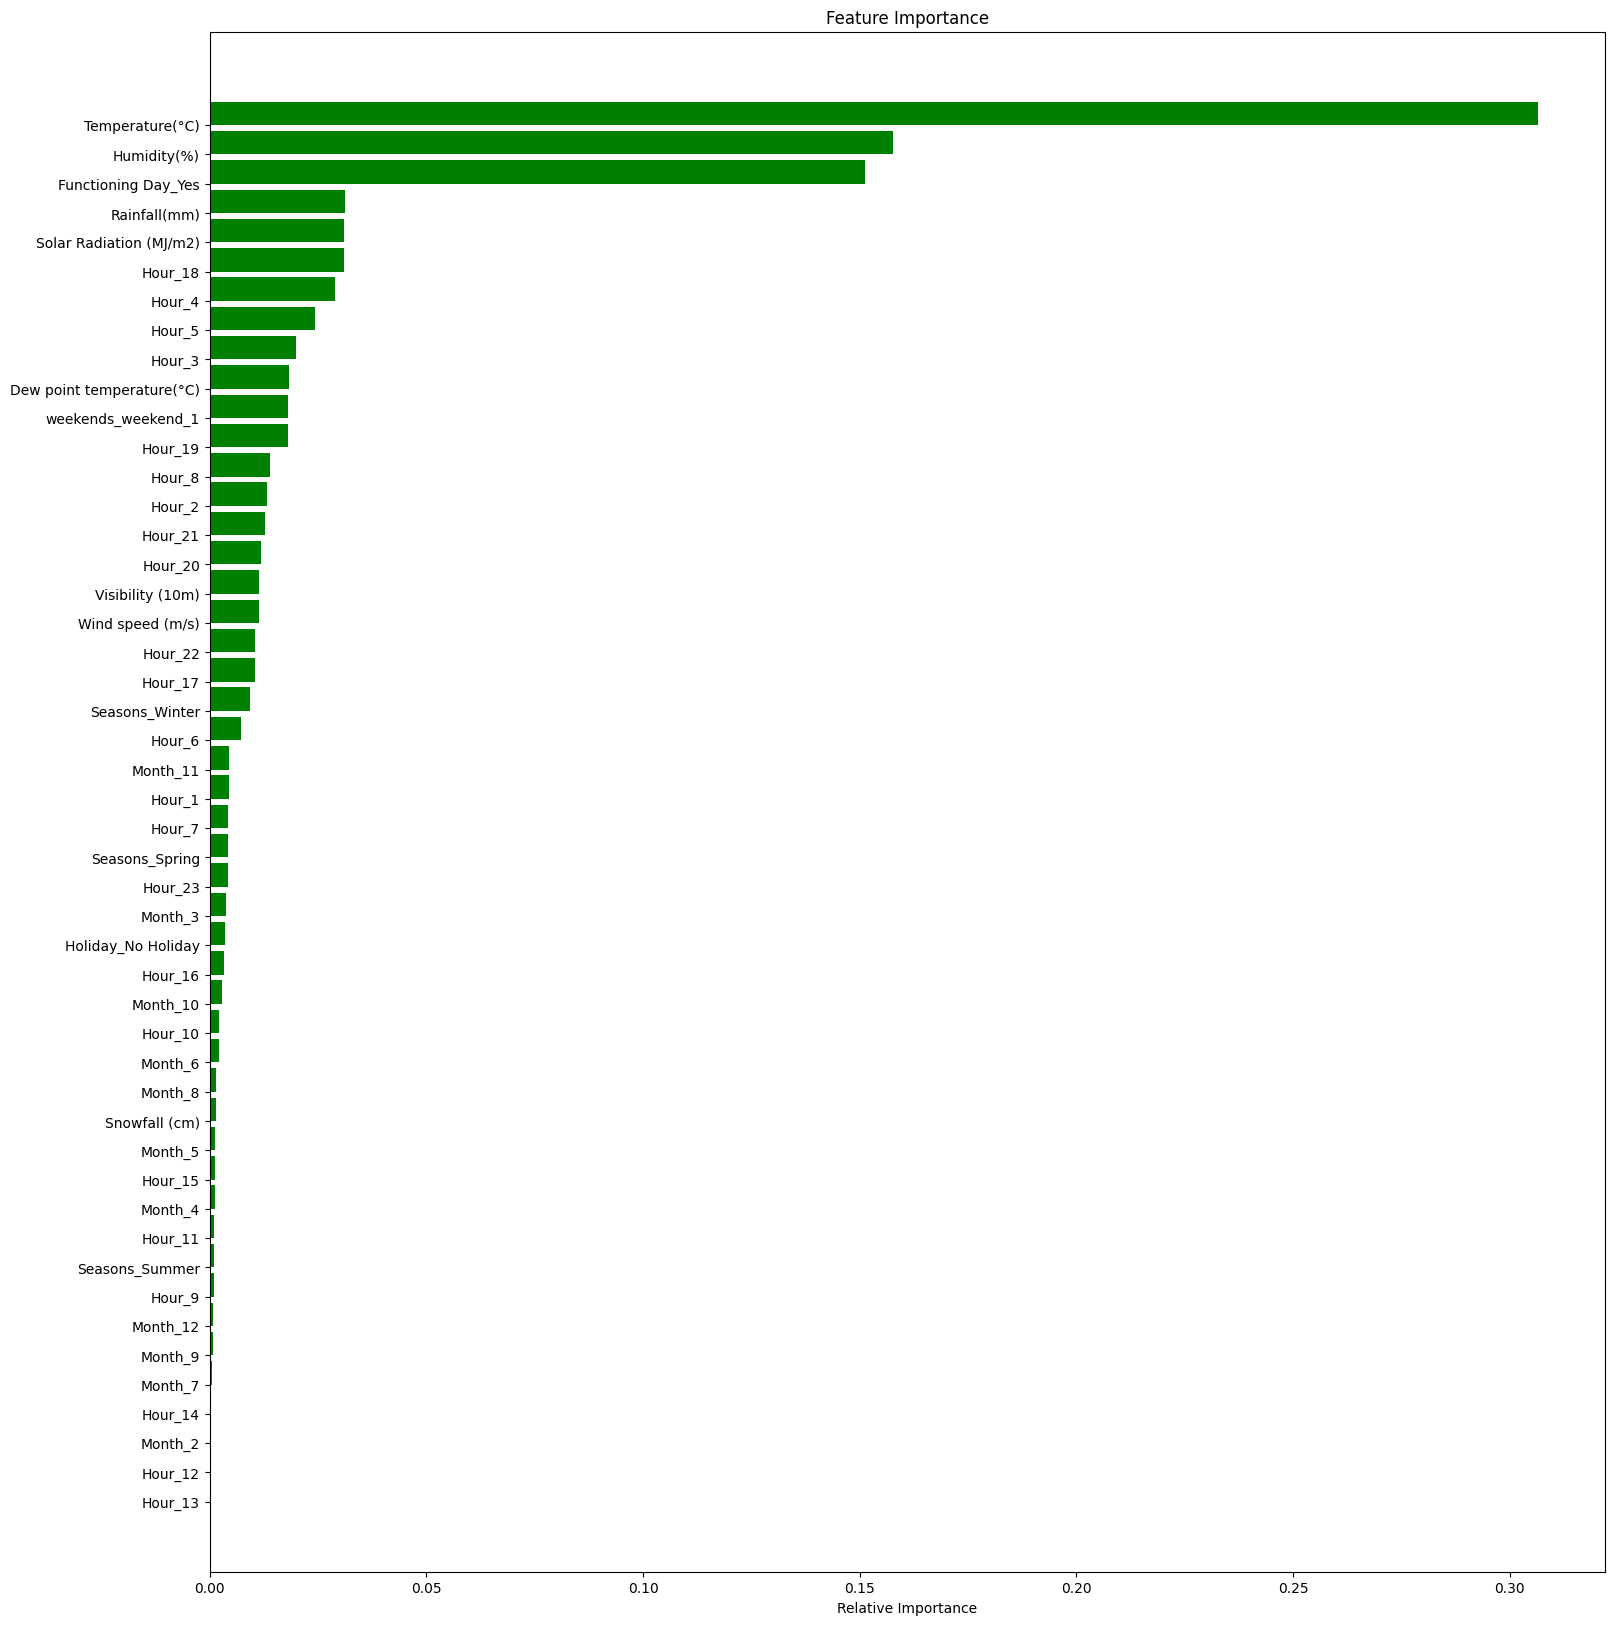

In [111]:
# Plot the Figure
plt.figure(figsize=(18,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='edge')
plt.yticks(range(len(indices)), [features[i]for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##**Grdient Boosting**

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

In [112]:
# import the packages 
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [113]:
# making predictions on train and test data
y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [114]:
# import the package
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))

# claculate MSE
MSE_gb=mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

# Calculate RMSE 
RMSE_gb = np.sqrt(MSE_gb)
print("RMSE :" ,RMSE_gb)

# Calculate MAE
MAE_gb = mean_absolute_error(y_train, y_pred_train_g)
print("MAE ;" ,MAE_gb)

#import the package
from sklearn.metrics import r2_score

#Calculate r2 and adjusted r2
r2_gb = r2_score(y_train ,y_pred_train_g)
print("R2:",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train,y_pred_train_g)) *((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjuested R2 :",1-(1-r2_score(y_train,y_pred_train_g)) *((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8792545917263987
MSE : 18.593667381891272
RMSE : 4.312037497737151
MAE ; 3.254456992544745
R2: 0.8792545917263987
Adjuested R2 : 0.8765475484769205


**It looks like our r2 score is 0.87, which means our model was able to capture most of the data variables. Let's save this in the comparison file for later comparison**

In [115]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((MSE_gb),3),
       'Adjuested R2':round((Adjusted_R2_gb),2)
}

training_df=pd.DataFrame(dict1,index=[1])

In [116]:
# import the package
from sklearn.metrics import mean_squared_error

# claculate MSE
MSE_gb=mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

# Calculate RMSE 
RMSE_gb = np.sqrt(MSE_gb)
print("RMSE :" ,RMSE_gb)

# Calculate MAE
MAE_gb = mean_absolute_error(y_test, y_pred_test_g)
print("MAE ;" ,MAE_gb)

#import the package
from sklearn.metrics import r2_score

#Calculate r2 and adjusted r2
r2_gb = r2_score(y_test ,y_pred_test_g)
print("R2:",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test),(y_pred_test_g))) *((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjuested R2 :",1-(1-r2_score((y_test),(y_pred_test_g))) *((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 21.310247653126293
RMSE : 4.61630237886626
MAE ; 3.4765416966243827
R2: 0.8650963293341631
Adjuested R2 : 0.8620718659096138


**The test's r2_score is 0.86. This means that our linear model performs well on the data. Let's try to show our residuals to see if there is heterosedasticity (even or not scattered).**

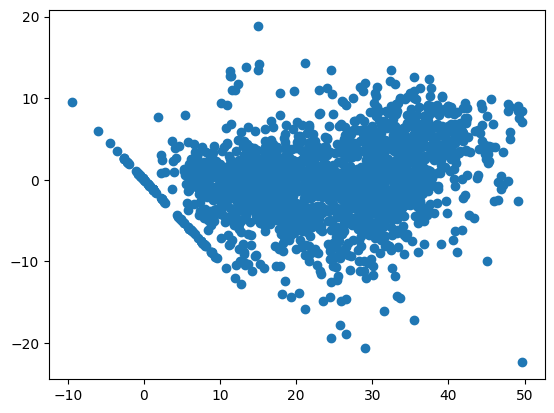

In [117]:
# Hetroscadacity 
plt.scatter((y_pred_test_g),(y_test-(y_pred_test_g)))

In [118]:
rf_model.feature_importances_

array([3.06596001e-01, 1.57780658e-01, 1.12722276e-02, 1.12754953e-02,
       1.83424419e-02, 3.10223243e-02, 3.12899992e-02, 1.37265689e-03,
       4.45796356e-03, 1.31622005e-02, 1.98762199e-02, 2.89130859e-02,
       2.43120743e-02, 7.14189361e-03, 4.21254208e-03, 1.38964111e-02,
       9.14695910e-04, 2.19715946e-03, 9.75812569e-04, 2.45590874e-04,
       2.43083687e-04, 3.92006217e-04, 1.26767198e-03, 3.36884161e-03,
       1.04384497e-02, 3.10013617e-02, 1.80071402e-02, 1.18144778e-02,
       1.27865081e-02, 1.04532389e-02, 4.11782310e-03, 4.20201832e-03,
       9.25252759e-04, 9.23788984e-03, 3.61397486e-03, 1.51119243e-01,
       3.01933680e-04, 3.81172686e-03, 1.12330732e-03, 1.31846011e-03,
       2.09403998e-03, 5.66748711e-04, 1.47736913e-03, 7.24873601e-04,
       2.93045423e-03, 4.53871628e-03, 7.72972605e-04, 1.80929618e-02])

In [119]:
importances = gb_model.feature_importances_


importance_dict = {'Feature':list(X_train.columns),
                    'Feature Importance': importances}

importance_df = pd.DataFrame(importance_dict)

In [120]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [121]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0             Temperature(°C)                0.32
35        Functioning Day_Yes                0.18
1                 Humidity(%)                0.13
6                Rainfall(mm)                0.07
5     Solar Radiation (MJ/m2)                0.05
33             Seasons_Winter                0.04
11                     Hour_4                0.03
25                    Hour_18                0.03
28                    Hour_21                0.02
26                    Hour_19                0.02
12                     Hour_5                0.02
47         weekends_weekend_1                0.02
10                     Hour_3                0.01
9                      Hour_2                0.01
44                   Month_10                0.01
13                     Hour_6                0.01
29                    Hour_22                0.01
4   Dew point temperature(°C)                0.01
27                    Hour_20                0.01
24                    Hour_17                0.01
15                     Hour_8                0.01
20                    Hour_13                0.00
2            Wind speed (m/s)                0.00
46                   Month_12                0.00
45                   Month_11                0.00
14                     Hour_7                0.00
43                    Month_9                0.00
42                    Month_8                0.00
41                    Month_7                0.00
40                    Month_6                0.00
39                    Month_5                0.00
38                    Month_4                0.00
37                    Month_3                0.00
36                    Month_2                0.00
34         Holiday_No Holiday                0.00
21                    Hour_14                0.00
3            Visibility (10m)                0.00
32             Seasons_Summer                0.00
31             Seasons_Spring                0.00
16                     Hour_9                0.00
17                    Hour_10                0.00
18                    Hour_11                0.00
7               Snowfall (cm)                0.00
8                      Hour_1                0.00
19                    Hour_12                0.00
23                    Hour_16                0.00
22                    Hour_15                0.00
30                    Hour_23                0.00

In [122]:
# Fit The Model
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [123]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

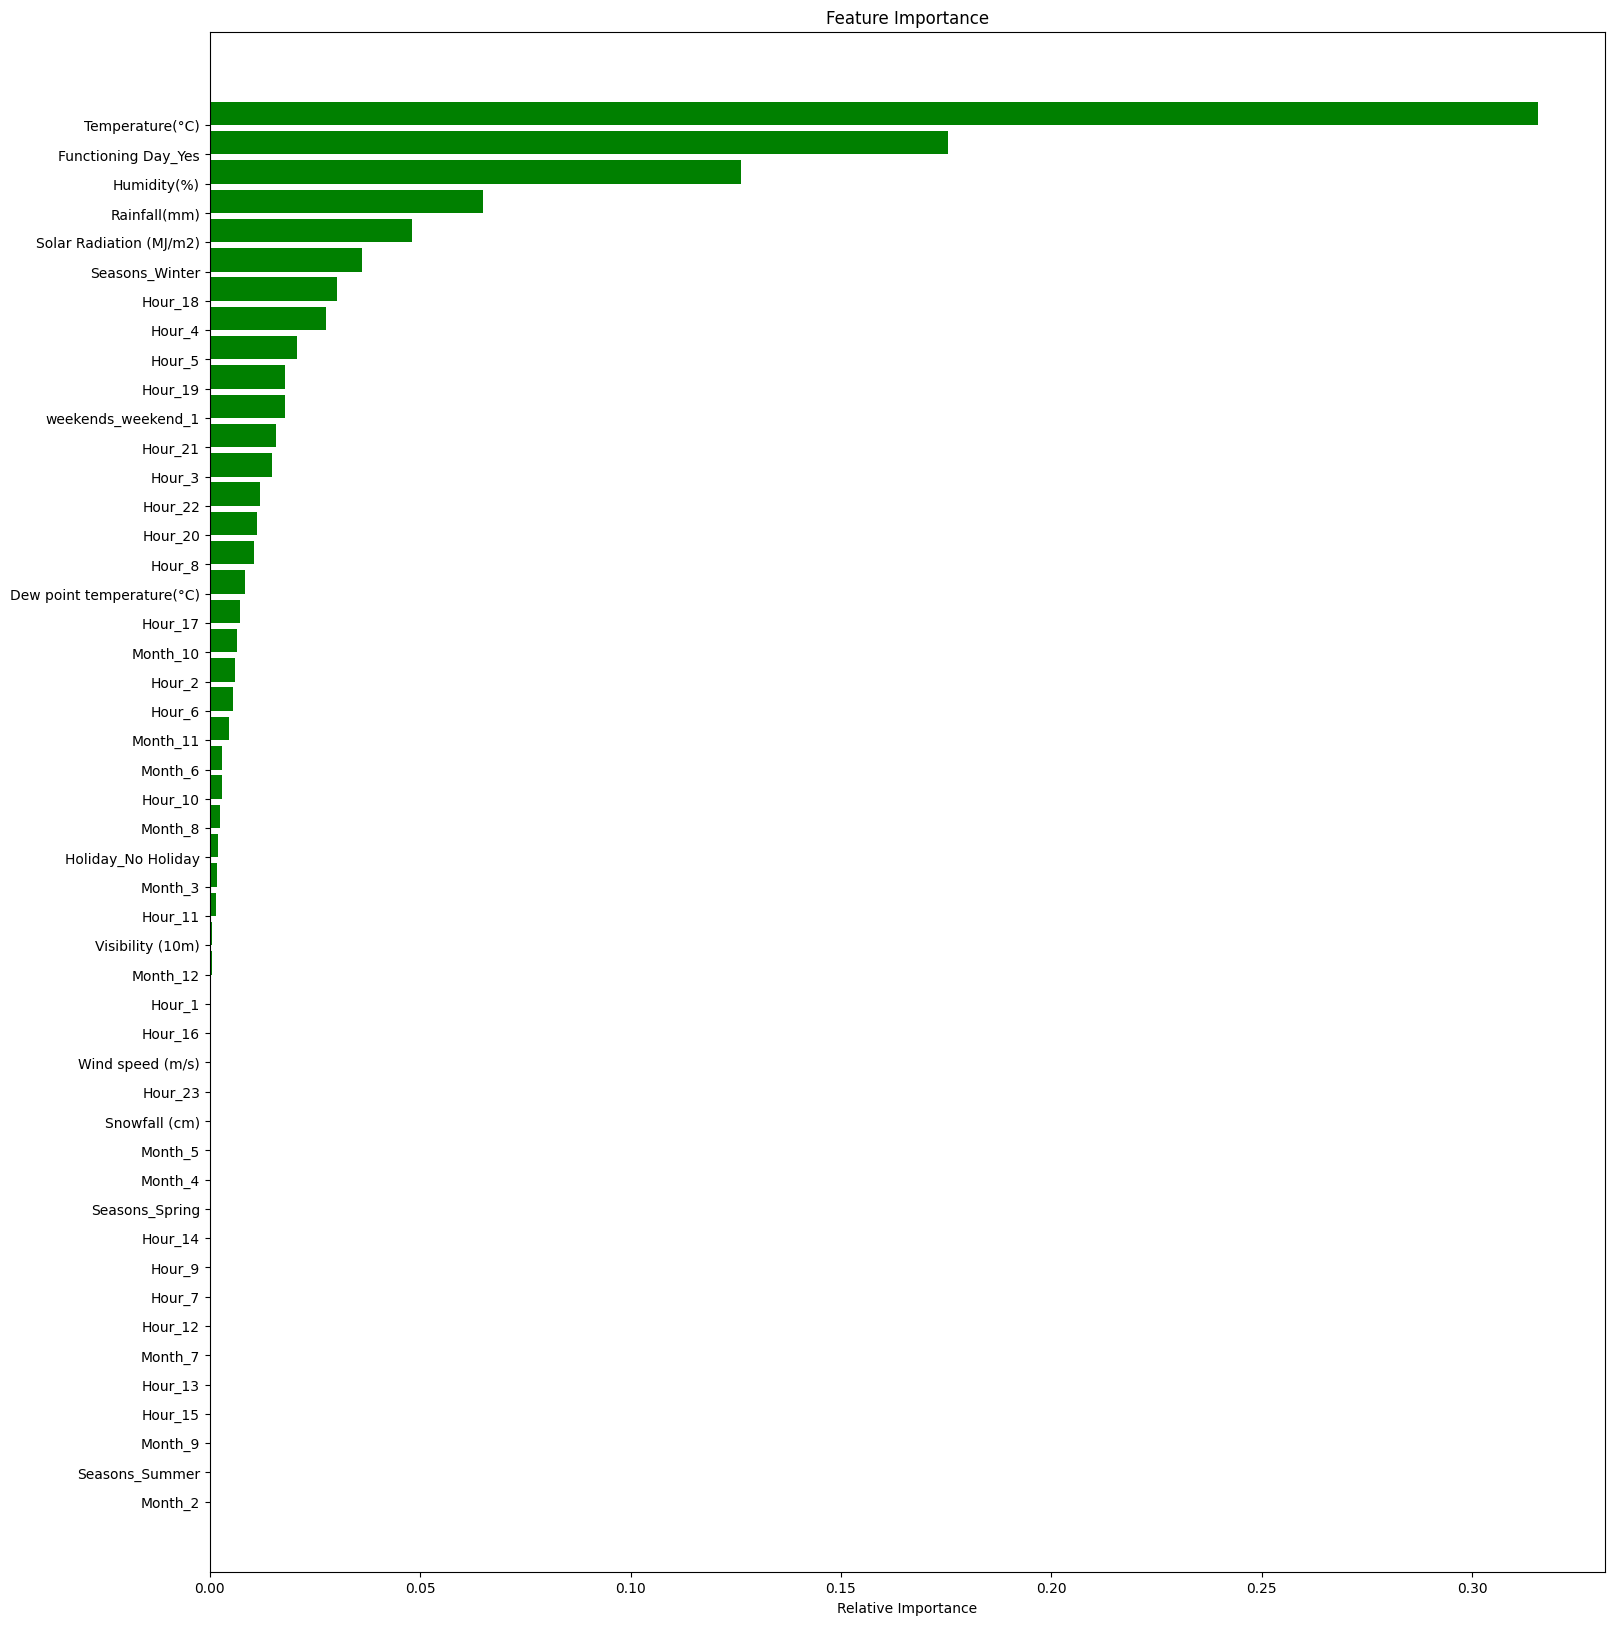

In [124]:
# Plot the Figure
plt.figure(figsize=(18,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='edge')
plt.yticks(range(len(indices)), [features[i]for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##**Hyperparameter tuning** 

**Before we move on to the next model, let's try fine-tuning some hyperparameters and see how our model's performance improves.**

**Hyperparameter tuning is the process of selecting the most appropriate hyperparameter set for a learning algorithm. Hyperparameters are parameter values ​​whose values ​​are set before learning starts. The key to machine learning algorithms is hyperparameter tuning.**

## **Using GridSearh**

**GridSearchCV helps to pre-evaluate parameters and fit the training model. Finally, we can select the best parameters from the list of hyperparameters.**

In [125]:
# Number of tress
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]


# Minimum number of samples required to split a node 
min_samples_split = [50,100,150]

#Minimum Number of samples required to split a node 
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [126]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

##**Importing Gradient Boosting Regressor** 

In [127]:
from sklearn.model_selection import GridSearchCV

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid Search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose =2
                       )
gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [128]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [129]:
gb_optimal_model = gb_grid.best_estimator_

In [130]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [131]:
# making predictions on train and test data
y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_test_g_g = gb_optimal_model.predict(X_test)

In [132]:
# import Package
from sklearn.metrics import mean_squared_error
print("Model Score :",gb_optimal_model.score(X_train,y_train))

MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gb)

RMSE_gbh=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gb)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gbh = (1-(1-r2_score((y_test) ,(y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score : 0.9519597791210633
MSE : 21.310247653126293
RMSE : 4.61630237886626
MAE : 3.4765416966243827
R2 : 0.8650963293341631
Adjusted R2 : 0.8620718659096138


In [133]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((MSE_gbh),3),
       'Adjuested R2':round((Adjusted_R2_gbh),2)
}

training_df=pd.DataFrame(dict1,index=[1])

In [134]:
# import Package
from sklearn.metrics import mean_squared_error

MSE_gbh= mean_squared_error(y_test, y_pred_test_g_g)
print("MSE :",MSE_gb)

RMSE_gbh=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


MAE_gbh= mean_absolute_error(y_test, y_pred_test_g_g)
print("MAE :",MAE_gb)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gbh = (1-(1-r2_score((y_test) ,(y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 21.310247653126293
RMSE : 4.61630237886626
MAE : 3.4765416966243827
R2 : 0.8650963293341631
Adjusted R2 : 0.8620718659096138


In [135]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((MSE_gbh),3),
       'Adjuested R2':round((Adjusted_R2_gbh),2)
}

test_df = pd.DataFrame(dict2,index=[1])

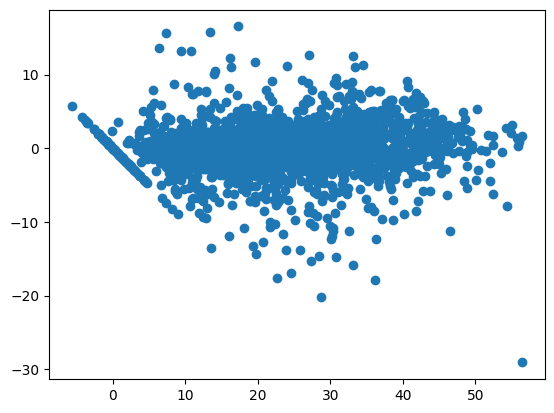

In [136]:
# Hetroscadacity 
plt.scatter((y_pred_test_g_g),(y_test-(y_pred_test_g_g)))

In [137]:
gb_optimal_model.feature_importances_

array([3.11740944e-01, 1.46819133e-01, 5.53087175e-03, 5.37687274e-03,
       1.59392853e-02, 3.55351564e-02, 4.27138768e-02, 1.17649329e-03,
       1.18207053e-03, 9.91419235e-03, 1.94654433e-02, 2.85172143e-02,
       2.43319991e-02, 6.74915552e-03, 4.12623596e-03, 1.26342023e-02,
       5.05699191e-04, 3.60636467e-03, 1.77331402e-03, 5.91365732e-05,
       1.35826112e-04, 8.38633329e-05, 3.16191891e-04, 1.20669705e-03,
       8.88505178e-03, 3.13339284e-02, 1.87710057e-02, 1.34219356e-02,
       1.35495664e-02, 1.04012994e-02, 2.11384095e-03, 3.10935148e-03,
       2.99908919e-04, 1.53418203e-02, 1.98254093e-03, 1.56831816e-01,
       2.25523091e-05, 1.13027249e-03, 1.17999747e-04, 1.38049823e-03,
       2.34215035e-03, 5.28001982e-04, 3.79002184e-03, 8.52068945e-05,
       6.61549658e-03, 4.93966702e-03, 1.14454472e-03, 2.24212825e-02])

In [138]:
importances = gb_optimal_model.feature_importances_
importance_dict = {'Feature':list(X_train.columns),
                    'Feature Importance': importances}

importance_df = pd.DataFrame(importance_dict)

In [139]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [140]:
importance_df.head()

Feature  Feature Importance
0            Temperature(°C)                0.31
1                Humidity(%)                0.15
2           Wind speed (m/s)                0.01
3           Visibility (10m)                0.01
4  Dew point temperature(°C)                0.02

In [141]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0             Temperature(°C)                0.31
35        Functioning Day_Yes                0.16
1                 Humidity(%)                0.15
5     Solar Radiation (MJ/m2)                0.04
6                Rainfall(mm)                0.04
11                     Hour_4                0.03
25                    Hour_18                0.03
33             Seasons_Winter                0.02
26                    Hour_19                0.02
12                     Hour_5                0.02
47         weekends_weekend_1                0.02
10                     Hour_3                0.02
4   Dew point temperature(°C)                0.02
44                   Month_10                0.01
2            Wind speed (m/s)                0.01
3            Visibility (10m)                0.01
9                      Hour_2                0.01
28                    Hour_21                0.01
27                    Hour_20                0.01
29                    Hour_22                0.01
24                    Hour_17                0.01
13                     Hour_6                0.01
15                     Hour_8                0.01
14                     Hour_7                0.00
46                   Month_12                0.00
45                   Month_11                0.00
43                    Month_9                0.00
42                    Month_8                0.00
41                    Month_7                0.00
40                    Month_6                0.00
39                    Month_5                0.00
38                    Month_4                0.00
37                    Month_3                0.00
36                    Month_2                0.00
20                    Hour_13                0.00
21                    Hour_14                0.00
32             Seasons_Summer                0.00
31             Seasons_Spring                0.00
30                    Hour_23                0.00
16                     Hour_9                0.00
17                    Hour_10                0.00
18                    Hour_11                0.00
19                    Hour_12                0.00
7               Snowfall (cm)                0.00
8                      Hour_1                0.00
23                    Hour_16                0.00
22                    Hour_15                0.00
34         Holiday_No Holiday                0.00

In [142]:
# Fit The Model
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [143]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

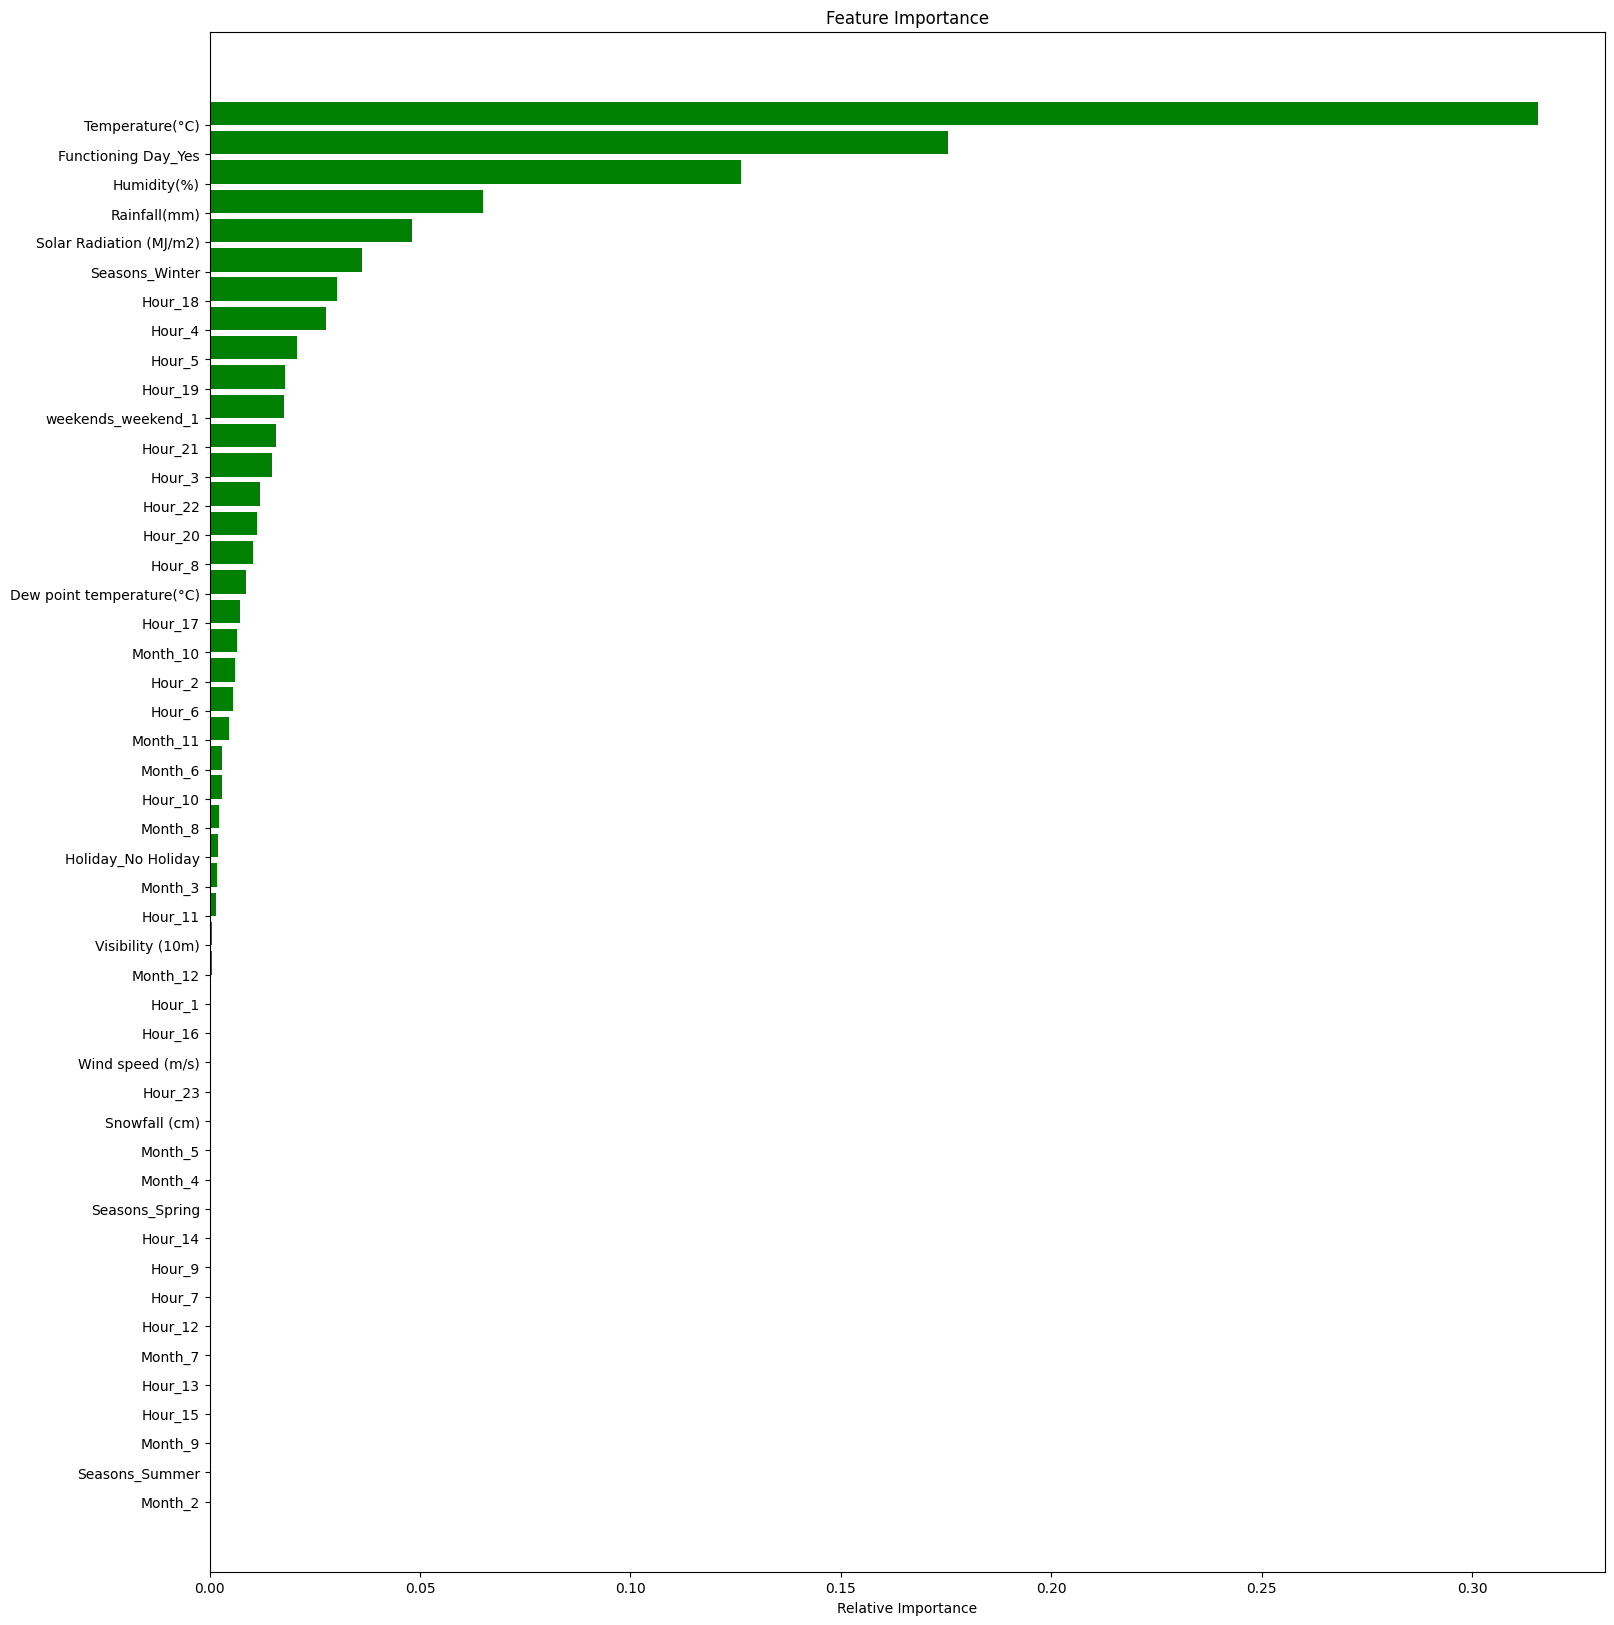

In [144]:
# Plot the Figure
plt.figure(figsize=(18,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='edge')
plt.yticks(range(len(indices)), [features[i]for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **Conclusion**

**1 . During the analysis, we started to do EDA on all the features of the data set. We identified and changed the first three aspects of "Rented Bike Count". Next, we analyzed categorical variables by removing the most common variables in a category, and also analyzed numerical variables to see their correlations, distributions, and effects corresponding to the difference between the two. We've also removed some of the most common 0-valued and single-code categorical variables.**

**2 .Next we use 7 machine learning algorithms Linear Regression, lasso, ridge, elastic mesh, cut trees, Random Forest and XGBoost.
We made hyperparameter tuning to improve the performance of our model. The results of our evaluation:**

**3 .No optimum performance.**

**4 .Random forest regressor and gradient assisted gridsearchcv give the highest R2 scores of 99% and 95% on the training set and 92% on the test set.**

**5 .andom forest and gradient boost have significant property differences.**

**6 .We can deploy this model.**

**7 .However, this is not the final result. Because these data are time dependent, variables such as temperature, wind speed and solar radiation are not necessarily important. Therefore, there are situations when the model does not perform well. Since machine learning is a constantly evolving process, we need to be prepared for any eventuality and check our models frequently.
Therefore, having a good knowledge and following the development of machine learning will help the person in the future.**